In [6]:
import pandas as pd
import geopandas as gpd

# === ACLED === #
acled_df = pd.read_csv("ACLED.csv", sep=";", parse_dates=["event_date"])
acled_df.columns = acled_df.columns.str.strip() 
acled_df.head(2)

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,source,source_scale,notes,fatalities,tags,timestamp,population_1km,population_2km,population_5km,population_best
0,SUD34776,2025-04-11,2025,1,Political violence,Battles,Armed clash,Rapid Support Forces,Darfur Arab Militia (Sudan),2,...,Al Mashhad Al Sudani; Alhamish Voice; Beam rep...,Other-New media,"On 11 April 2025, clashes between RSF, backed ...",26,NaN,1744679413,6401.0,19512.0,41764.0,41764.0
1,SUD34776,2025-04-11,2025,1,Political violence,Battles,Armed clash,Military Forces of Sudan (2019-),Darfur Joint Forces/JSAMF: Joint Force of Arme...,1,...,Al Mashhad Al Sudani; Alhamish Voice; Beam rep...,Other-New media,"On 11 April 2025, clashes between RSF, backed ...",26,NaN,1744679413,6401.0,19512.0,41764.0,41764.0


In [7]:
acled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60934 entries, 0 to 60933
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   event_id_cnty       60934 non-null  object        
 1   event_date          60934 non-null  datetime64[ns]
 2   year                60934 non-null  int64         
 3   time_precision      60934 non-null  int64         
 4   disorder_type       60934 non-null  object        
 5   event_type          60934 non-null  object        
 6   sub_event_type      60934 non-null  object        
 7   actor1              60934 non-null  object        
 8   assoc_actor_1       15479 non-null  object        
 9   inter1              60934 non-null  int64         
 10  interaction         60934 non-null  int64         
 11  civilian_targeting  23132 non-null  object        
 12  iso                 60934 non-null  int64         
 13  region              60934 non-null  object    

In [8]:
print("Date range:", acled_df['event_date'].min(), "to", acled_df['event_date'].max())
print("Number of unique dates:", acled_df['event_date'].nunique())

Date range: 1997-01-01 00:00:00 to 2025-04-11 00:00:00
Number of unique dates: 6811


In [9]:
# === UPSALA - GEDEvent_v25_1 === #
gedevent_df = pd.read_csv("GEDEvent_v25_1.csv")
gedevent_df.columns = gedevent_df.columns.str.strip()
gedevent_df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\2647721051.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  gedevent_df = pd.read_csv("GEDEvent_v25_1.csv")


,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,True,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,412700,IRQ-2021-1-524-145,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-26 00:00:00.000,13,1,141,28,183,184,171,645,NaN
2,413023,IRQ-2021-1-524-143,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-28 00:00:00.000,0,2,0,0,2,3,0,645,NaN
3,412909,IRQ-2021-1-524-144,2021,True,Clear,1,259,259,Iraq: Government,524,...,2021-08-29 00:00:00.000,0,0,10,0,10,10,9,645,NaN
4,132140,AFG-1989-1-411-2,1989,True,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN


In [10]:
gedevent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385918 entries, 0 to 385917
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 385918 non-null  int64  
 1   relid              385918 non-null  object 
 2   year               385918 non-null  int64  
 3   active_year        385918 non-null  bool   
 4   code_status        385918 non-null  object 
 5   type_of_violence   385918 non-null  int64  
 6   conflict_dset_id   385918 non-null  int64  
 7   conflict_new_id    385918 non-null  int64  
 8   conflict_name      385918 non-null  object 
 9   dyad_dset_id       385918 non-null  int64  
 10  dyad_new_id        385918 non-null  int64  
 11  dyad_name          385918 non-null  object 
 12  side_a_dset_id     385918 non-null  int64  
 13  side_a_new_id      385918 non-null  int64  
 14  side_a             385918 non-null  object 
 15  side_b_dset_id     385918 non-null  int64  
 16  si

In [11]:
# Filter for Sudan
ged_sudan_df = gedevent_df[gedevent_df['country'].str.lower() == 'sudan']


In [12]:
ged_sudan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4556 entries, 242534 to 247089
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4556 non-null   int64  
 1   relid              4556 non-null   object 
 2   year               4556 non-null   int64  
 3   active_year        4556 non-null   bool   
 4   code_status        4556 non-null   object 
 5   type_of_violence   4556 non-null   int64  
 6   conflict_dset_id   4556 non-null   int64  
 7   conflict_new_id    4556 non-null   int64  
 8   conflict_name      4556 non-null   object 
 9   dyad_dset_id       4556 non-null   int64  
 10  dyad_new_id        4556 non-null   int64  
 11  dyad_name          4556 non-null   object 
 12  side_a_dset_id     4556 non-null   int64  
 13  side_a_new_id      4556 non-null   int64  
 14  side_a             4556 non-null   object 
 15  side_b_dset_id     4556 non-null   int64  
 16  side_b_new_id      455

In [13]:
# Duration of dataset GED #
ged_sudan_df['date_start'].min(), ged_sudan_df['date_start'].max()


('1989-01-01 00:00:00.000', '2024-12-31 00:00:00.000')

In [14]:
ged_sudan_df['date_start'] = pd.to_datetime(ged_sudan_df['date_start'])
ged_sudan_df['date_end'] = pd.to_datetime(ged_sudan_df['date_end'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\4240904929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ged_sudan_df['date_start'] = pd.to_datetime(ged_sudan_df['date_start'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\4240904929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ged_sudan_df['date_end'] = pd.to_datetime(ged_sudan_df['date_end'])


In [15]:
ged_sudan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4556 entries, 242534 to 247089
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 4556 non-null   int64         
 1   relid              4556 non-null   object        
 2   year               4556 non-null   int64         
 3   active_year        4556 non-null   bool          
 4   code_status        4556 non-null   object        
 5   type_of_violence   4556 non-null   int64         
 6   conflict_dset_id   4556 non-null   int64         
 7   conflict_new_id    4556 non-null   int64         
 8   conflict_name      4556 non-null   object        
 9   dyad_dset_id       4556 non-null   int64         
 10  dyad_new_id        4556 non-null   int64         
 11  dyad_name          4556 non-null   object        
 12  side_a_dset_id     4556 non-null   int64         
 13  side_a_new_id      4556 non-null   int64         
 14  side_a

In [16]:
# Duration of dataset ACLED #
acled_df['event_date'].min(), acled_df['event_date'].max()


(Timestamp('1997-01-01 00:00:00'), Timestamp('2025-04-11 00:00:00'))

In [17]:
# Filter ACLED #
acled_filtered = acled_df[
    (acled_df['event_date'] >= '1997-01-01') &
    (acled_df['event_date'] <= '2024-12-31')
]


In [18]:
# Filter UCDP GED #
ged_sudan_filtered = ged_sudan_df[
    (ged_sudan_df['date_start'] >= '1997-01-01') &
    (ged_sudan_df['date_start'] <= '2024-12-31')
]


In [19]:
print("ACLED:", acled_filtered['event_date'].min(), "to", acled_filtered['event_date'].max())
print("GED:", ged_sudan_filtered['date_start'].min(), "to", ged_sudan_filtered['date_start'].max())


ACLED: 1997-01-01 00:00:00 to 2024-12-31 00:00:00
GED: 1997-01-01 00:00:00 to 2024-12-31 00:00:00


# Structuring the Weekly EWS Model


### Filtering for ACLED to the date duration (2013-01-01 to 2024-12-31)

In [20]:
acled_filtered['event_date'] = pd.to_datetime(acled_filtered['event_date'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\4117259389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acled_filtered['event_date'] = pd.to_datetime(acled_filtered['event_date'])


In [21]:
# Define the desired date range
start_date = '2013-01-01'
end_date = '2024-12-31'

# Filter the DataFrame
acled_filtered = acled_filtered[
    (acled_filtered['event_date'] >= start_date) & 
    (acled_filtered['event_date'] <= end_date)
].copy()

# Create a new column representing the start of each week (week starts on Sunday)
acled_filtered['week_start'] = acled_filtered['event_date'] - pd.to_timedelta(acled_filtered['event_date'].dt.weekday + 1, unit='D')
acled_filtered['week_start'] = pd.to_datetime(acled_filtered['week_start'])

# Confirm the range and shape
print(f"Filtered data from {start_date} to {end_date}: {acled_filtered.shape[0]} records")
print(f"First date: {acled_filtered['event_date'].min()}, Last date: {acled_filtered['event_date'].max()}")
print(acled_filtered[['event_date', 'week_start']].head())

Filtered data from 2013-01-01 to 2024-12-31: 47347 records
First date: 2013-01-01 00:00:00, Last date: 2024-12-31 00:00:00
     event_date week_start
3821 2024-12-31 2024-12-29
3822 2024-12-31 2024-12-29
3823 2024-12-31 2024-12-29
3824 2024-12-31 2024-12-29
3825 2024-12-31 2024-12-29


## Flitering for UCDP for date duration (2013-01-01 to 2024-12-31)

In [22]:
ged_sudan_filtered['date_start'] = pd.to_datetime(ged_sudan_filtered['date_start'])

# Define the desired date range
start_date = '2013-01-01'
end_date = '2024-12-31'

# Filter the UCDP DataFrame
ged_sudan_filtered = ged_sudan_filtered[
    (ged_sudan_filtered['date_start'] >= start_date) & 
    (ged_sudan_filtered['date_start'] <= end_date)
].copy()

# Create a new column representing the start of each week (week starts on Sunday)
ged_sudan_filtered['week_start'] = ged_sudan_filtered['date_start'] - pd.to_timedelta(ged_sudan_filtered['date_start'].dt.weekday + 1, unit='D')
ged_sudan_filtered['week_start'] = pd.to_datetime(ged_sudan_filtered['week_start'])

# Confirm the range and shape
print(f"Filtered UCDP data from {start_date} to {end_date}: {ged_sudan_filtered.shape[0]} records")
print(f"First date: {ged_sudan_filtered['date_start'].min()}, Last date: {ged_sudan_filtered['date_start'].max()}")
print(ged_sudan_filtered[['date_start', 'week_start']].head())


Filtered UCDP data from 2013-01-01 to 2024-12-31: 2509 records
First date: 2013-01-01 00:00:00, Last date: 2024-12-31 00:00:00
       date_start week_start
242534 2022-01-01 2021-12-26
242535 2022-01-18 2022-01-16
242536 2022-03-21 2022-03-20
242537 2022-03-27 2022-03-20
242538 2022-03-27 2022-03-20


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\3557912721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ged_sudan_filtered['date_start'] = pd.to_datetime(ged_sudan_filtered['date_start'])


In [23]:
ged_sudan_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2509 entries, 242534 to 247089
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2509 non-null   int64         
 1   relid              2509 non-null   object        
 2   year               2509 non-null   int64         
 3   active_year        2509 non-null   bool          
 4   code_status        2509 non-null   object        
 5   type_of_violence   2509 non-null   int64         
 6   conflict_dset_id   2509 non-null   int64         
 7   conflict_new_id    2509 non-null   int64         
 8   conflict_name      2509 non-null   object        
 9   dyad_dset_id       2509 non-null   int64         
 10  dyad_new_id        2509 non-null   int64         
 11  dyad_name          2509 non-null   object        
 12  side_a_dset_id     2509 non-null   int64         
 13  side_a_new_id      2509 non-null   int64         
 14  side_a

In [24]:
print(ged_sudan_filtered[['adm_1', 'where_description', 'adm_2']].head(10))


                       adm_1  \
242534         Gedarif state   
242535         Gedarif state   
242536         Gedarif state   
242537         Gedarif state   
242538         Gedarif state   
242539         Gedarif state   
242540         Gedarif state   
243243    South Darfur state   
243244    South Darfur state   
243245  Central Darfur state   

                                        where_description                adm_2  
242534  Sudan-Ethiopia border; Sudan side of the borde...  El Fashaga district  
242535              Brecht area, Sudan side of the border  El Fashaga district  
242536                                      Brecht (near)  El Fashaga district  
242537                        Lugdi (right on the border)  El Fashaga district  
242538                       Logbi, Dima and Brecht areas  El Fashaga district  
242539                                       Bereket area  El Fashaga district  
242540  near the border with Tigray, near Tekeze river...  El Fashaga district  

In [25]:
acled_filtered[['admin1', 'admin2', 'admin3', 'location']].head()


,admin1,admin2,admin3,location
3821,Al Jazirah,Al Hasahisa,NaN,Abd Al Majid
3822,Al Jazirah,Al Hasahisa,NaN,Abd Al Majid
3823,Al Jazirah,Al Hasahisa,NaN,Abu Gouta
3824,Al Jazirah,Al Hasahisa,NaN,Abu Gouta
3825,Al Jazirah,Al Hasahisa,NaN,Bijeja 13


In [26]:
import pandas as pd

# Step 1: Ensure event_date is in datetime format
acled_filtered['event_date'] = pd.to_datetime(acled_filtered['event_date'])

# Step 2: Create 'week_start' column - Sunday as the start of the week
acled_filtered['week_start'] = acled_filtered['event_date'] - pd.to_timedelta((acled_filtered['event_date'].dt.weekday + 1) % 7, unit='D')

# Step 3: Relevant Features to calculate indicators
acled_weekly_regional = acled_filtered[['week_start', 'admin1', 'event_type', 'fatalities', 'actor1']].copy()

# Step 4: Sort for clarity
acled_weekly_regional = acled_weekly_regional.sort_values(['admin1', 'week_start'])

print(acled_weekly_regional.head(10))


      week_start admin1                  event_type  fatalities  \
51164 2012-12-30  Abyei      Strategic developments           0   
51165 2012-12-30  Abyei      Strategic developments           0   
50941 2013-02-10  Abyei                     Battles           7   
50942 2013-02-10  Abyei                     Battles           7   
50903 2013-02-17  Abyei                     Battles          10   
50904 2013-02-17  Abyei                     Battles          10   
50909 2013-02-17  Abyei  Violence against civilians           7   
50910 2013-02-17  Abyei  Violence against civilians           7   
50826 2013-03-10  Abyei      Strategic developments           0   
50827 2013-03-10  Abyei      Strategic developments           0   

                                       actor1  
51164      JEM: Justice and Equality Movement  
51165                       Civilians (Sudan)  
50941    Military Forces of Sudan (1989-2019)  
50942        Misseriya Ethnic Militia (Sudan)  
50903        Misseriya

## Extract Weekly Region Combinations from ged_sudan_filtered

In [27]:
import pandas as pd

# Step 1: Ensure date_start is in datetime format
ged_sudan_filtered['date_start'] = pd.to_datetime(ged_sudan_filtered['date_start'])

# Step 2: Create 'week_start' column - Sunday as the start of the week
ged_sudan_filtered['week_start'] = ged_sudan_filtered['date_start'] - pd.to_timedelta((ged_sudan_filtered['date_start'].dt.weekday + 1) % 7, unit='D')

# Step 3: Relevant Features needed for indicators
ged_weekly_regional = ged_sudan_filtered[
    ['week_start', 'adm_1', 'type_of_violence', 'deaths_a', 'deaths_b', 'deaths_civilians', 'dyad_name']
].copy()

ged_weekly_regional = ged_weekly_regional.sort_values(['adm_1', 'week_start'])

print(ged_weekly_regional.head(10))


       week_start            adm_1  type_of_violence  deaths_a  deaths_b  \
245506 2012-12-30  Blue Nile state                 1         0         0   
245521 2013-02-10  Blue Nile state                 1         3         0   
245525 2013-02-24  Blue Nile state                 1         0         0   
245526 2013-02-24  Blue Nile state                 1         0         0   
245529 2013-03-03  Blue Nile state                 1         0         0   
245537 2013-04-07  Blue Nile state                 1         0         0   
245538 2013-04-07  Blue Nile state                 1         0         0   
245572 2013-08-25  Blue Nile state                 1         0         4   
245573 2013-08-25  Blue Nile state                 1         0         0   
245587 2013-11-24  Blue Nile state                 1         0         0   

        deaths_civilians                  dyad_name  
245506                 0  Government of Sudan - SRF  
245521                 0  Government of Sudan - SRF  
2

# ---------------------------------------------------------------------------------

## The Calculation of indicators


## ACLED Indicators

### **ACLED Indicator 1: Total Events per Week per Region**



In [28]:
# Step 1: Calculate total events per region per week
event_counts = (
    acled_weekly_regional
    .groupby(['week_start', 'admin1'])
    .size()
    .reset_index(name='total_events')
)

# Step 2: Merge it back into the original DataFrame
acled_weekly_regional = acled_weekly_regional.merge(
    event_counts,
    on=['week_start', 'admin1'],
    how='left'
)

acled_weekly_regional.head()


,week_start,admin1,event_type,fatalities,actor1,total_events
0,2012-12-30,Abyei,Strategic developments,0,JEM: Justice and Equality Movement,2
1,2012-12-30,Abyei,Strategic developments,0,Civilians (Sudan),2
2,2013-02-10,Abyei,Battles,7,Military Forces of Sudan (1989-2019),2
3,2013-02-10,Abyei,Battles,7,Misseriya Ethnic Militia (Sudan),2
4,2013-02-17,Abyei,Battles,10,Misseriya Ethnic Militia (Sudan),4


### **ACLED Indicator 2: Total Fatalities per Week per Region**


In [29]:
# Step 1: Calculate total fatalities per region per week
fatality_sums = (
    acled_weekly_regional
    .groupby(['week_start', 'admin1'])['fatalities']
    .sum()
    .reset_index(name='total_fatalities')
)

# Step 2: Merge it back into the main DataFrame
acled_weekly_regional = acled_weekly_regional.merge(
    fatality_sums,
    on=['week_start', 'admin1'],
    how='left'
)

acled_weekly_regional.head()


,week_start,admin1,event_type,fatalities,actor1,total_events,total_fatalities
0,2012-12-30,Abyei,Strategic developments,0,JEM: Justice and Equality Movement,2,0
1,2012-12-30,Abyei,Strategic developments,0,Civilians (Sudan),2,0
2,2013-02-10,Abyei,Battles,7,Military Forces of Sudan (1989-2019),2,14
3,2013-02-10,Abyei,Battles,7,Misseriya Ethnic Militia (Sudan),2,14
4,2013-02-17,Abyei,Battles,10,Misseriya Ethnic Militia (Sudan),4,34


### **ACLED Indicator 3: Number of Violent Events per Week per Region**


In [30]:
acled_weekly_regional['event_type'].unique()


array(['Strategic developments', 'Battles', 'Violence against civilians',
       'Explosions/Remote violence', 'Protests', 'Riots'], dtype=object)

In [31]:
# Step 1: Define violent event types based on ACLED classifications
violent_event_types = [
    'Battles',
    'Explosions/Remote violence',
    'Violence against civilians'
]

# Step 2: Filter only violent events
violent_events = acled_weekly_regional[
    acled_weekly_regional['event_type'].isin(violent_event_types)
]

# Step 3: Count violent events per week and region
violent_event_counts = (
    violent_events
    .groupby(['week_start', 'admin1'])
    .size()
    .reset_index(name='num_violent_events')
)

# Step 4: Merge with main DataFrame
acled_weekly_regional = acled_weekly_regional.merge(
    violent_event_counts,
    on=['week_start', 'admin1'],
    how='left'
)

acled_weekly_regional.head()


,week_start,admin1,event_type,fatalities,actor1,total_events,total_fatalities,num_violent_events
0,2012-12-30,Abyei,Strategic developments,0,JEM: Justice and Equality Movement,2,0,NaN
1,2012-12-30,Abyei,Strategic developments,0,Civilians (Sudan),2,0,NaN
2,2013-02-10,Abyei,Battles,7,Military Forces of Sudan (1989-2019),2,14,2.0
3,2013-02-10,Abyei,Battles,7,Misseriya Ethnic Militia (Sudan),2,14,2.0
4,2013-02-17,Abyei,Battles,10,Misseriya Ethnic Militia (Sudan),4,34,4.0


In [32]:
acled_weekly_regional['num_violent_events'].isna().sum()

np.int64(6384)

### **ACLED Indicator 4: Number of Unique Conflict Actors per Week per Region**


In [33]:
# Step 1: Count unique actor1 types per region per week
actor1_diversity = (
    acled_weekly_regional
    .groupby(['week_start', 'admin1'])['actor1']
    .nunique()
    .reset_index(name='actor1_diversity')
)

# Step 2: Merge back into main DataFrame
acled_weekly_regional = acled_weekly_regional.merge(
    actor1_diversity,
    on=['week_start', 'admin1'],
    how='left'
)

acled_weekly_regional.head()


,week_start,admin1,event_type,fatalities,actor1,total_events,total_fatalities,num_violent_events,actor1_diversity
0,2012-12-30,Abyei,Strategic developments,0,JEM: Justice and Equality Movement,2,0,NaN,2
1,2012-12-30,Abyei,Strategic developments,0,Civilians (Sudan),2,0,NaN,2
2,2013-02-10,Abyei,Battles,7,Military Forces of Sudan (1989-2019),2,14,2.0,2
3,2013-02-10,Abyei,Battles,7,Misseriya Ethnic Militia (Sudan),2,14,2.0,2
4,2013-02-17,Abyei,Battles,10,Misseriya Ethnic Militia (Sudan),4,34,4.0,4


### **ACLED Indicator 5: Proportion of Violent Events per Week per Region**


In [34]:
# Define the violent event types
violent_types = ['Battles', 'Violence against civilians', 'Explosions/Remote violence']

# Mark each event as violent (1) or not (0)
acled_weekly_regional['is_violent'] = acled_weekly_regional['event_type'].isin(violent_types).astype(int)

# Compute total and violent events per week/region
violent_stats = (
    acled_weekly_regional
    .groupby(['week_start', 'admin1'])
    .agg(total_events=('event_type', 'count'),
         violent_events=('is_violent', 'sum'))
)

# Merge proportion back into the main DataFrame
acled_weekly_regional = acled_weekly_regional.merge(
    (violent_stats.assign(
        violent_event_proportion=lambda df: df['violent_events'] / df['total_events']
    ).reset_index()[['week_start', 'admin1', 'violent_event_proportion']]),
    on=['week_start', 'admin1'],
    how='left'
)


In [35]:
acled_weekly_regional.head()

,week_start,admin1,event_type,fatalities,actor1,total_events,total_fatalities,num_violent_events,actor1_diversity,is_violent,violent_event_proportion
0,2012-12-30,Abyei,Strategic developments,0,JEM: Justice and Equality Movement,2,0,NaN,2,0,0.0
1,2012-12-30,Abyei,Strategic developments,0,Civilians (Sudan),2,0,NaN,2,0,0.0
2,2013-02-10,Abyei,Battles,7,Military Forces of Sudan (1989-2019),2,14,2.0,2,1,1.0
3,2013-02-10,Abyei,Battles,7,Misseriya Ethnic Militia (Sudan),2,14,2.0,2,1,1.0
4,2013-02-17,Abyei,Battles,10,Misseriya Ethnic Militia (Sudan),4,34,4.0,4,1,1.0


In [36]:
acled_weekly_regional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47347 entries, 0 to 47346
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   week_start                47347 non-null  datetime64[ns]
 1   admin1                    47347 non-null  object        
 2   event_type                47347 non-null  object        
 3   fatalities                47347 non-null  int64         
 4   actor1                    47347 non-null  object        
 5   total_events              47347 non-null  int64         
 6   total_fatalities          47347 non-null  int64         
 7   num_violent_events        40963 non-null  float64       
 8   actor1_diversity          47347 non-null  int64         
 9   is_violent                47347 non-null  int64         
 10  violent_event_proportion  47347 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(5), object(3)
memory usage: 4.0+ MB


## Derived Indicators

## Fatalities per Event

In [37]:
# Fatalities per Event = total fatalities / total events
acled_weekly_regional['fatalities_per_event'] = (
    acled_weekly_regional['total_fatalities'] / acled_weekly_regional['total_events']
)

# Handle division by zero (if total_events = 0)
acled_weekly_regional['fatalities_per_event'] = acled_weekly_regional['fatalities_per_event'].fillna(0)
acled_weekly_regional['fatalities_per_event'].head()

0    0.0
1    0.0
2    7.0
3    7.0
4    8.5
Name: fatalities_per_event, dtype: float64

## Violence Ratio Trend. 

In [38]:
# --- Aggregation ---
agg_df = (
    acled_weekly_regional
    .groupby(['week_start', 'admin1'])
    .agg(
        total_events=('total_events', 'max'),
        total_fatalities=('total_fatalities', 'max'),
        num_violent_events=('num_violent_events', 'max'),
        actor1_diversity=('actor1_diversity', 'max'),
    )
    .reset_index()
)

# --- Derived indicators ---
agg_df['violent_event_proportion'] = (
    agg_df['num_violent_events'] / agg_df['total_events']
).fillna(0)

agg_df['fatalities_per_event'] = (
    agg_df['total_fatalities'] / agg_df['total_events']
).fillna(0)

agg_df['violence_ratio_trend'] = (
    agg_df.groupby('admin1')['violent_event_proportion']
    .diff()
    .fillna(0)
)

In [39]:
print("Shape:", agg_df.shape)
print("Duplicate rows:", agg_df.duplicated(subset=['week_start', 'admin1']).sum())
print("Time range:", agg_df['week_start'].min(), "→", agg_df['week_start'].max())
print("Unique weeks:", agg_df['week_start'].nunique())
print("Unique regions:", agg_df['admin1'].nunique())

Shape: (6136, 9)
Duplicate rows: 0
Time range: 2012-12-30 00:00:00 → 2024-12-29 00:00:00
Unique weeks: 627
Unique regions: 19


## Actor Volatility: Measures fluctuations in the number of unique conflict actors, flagging new entrants or exits

In [40]:
# Relative Actor Volatility (% change compared to previous week)
acled_weekly_regional['actor_volatility_relative'] = (
    agg_df.groupby('admin1')['actor1_diversity']
    .pct_change()          # percentage change week-to-week
    .abs()                 # take absolute value
    .fillna(0)             # first week = 0
)


## Conflict Intensity Inde


In [41]:
from sklearn.preprocessing import StandardScaler

# Step 1: Aggregate relevant features by week and region
weekly_features = acled_weekly_regional.groupby(['week_start', 'admin1']).agg(
    total_fatalities=('total_fatalities', 'sum'),
    total_events=('total_events', 'sum'),
    num_violent_events=('num_violent_events', 'sum'),
    violent_event_proportion=('violent_event_proportion', 'mean')
).reset_index()

# Step 2: Handle missing values
features = ["total_fatalities", "total_events", "num_violent_events", "violent_event_proportion"]
weekly_features[features] = weekly_features[features].fillna(0)

# Step 3: Standardize features (z-score)
scaler = StandardScaler()
weekly_features[[f + "_z" for f in features]] = scaler.fit_transform(weekly_features[features])

# Step 4: Compute Conflict Intensity Index
weekly_features['conflict_intensity_index'] = weekly_features[[f + "_z" for f in features]].mean(axis=1)

# Step 5: Merge back into original dataframe
acled_weekly_regional = acled_weekly_regional.merge(
    weekly_features[['week_start', 'admin1', 'conflict_intensity_index']],
    on=['week_start', 'admin1'],
    how='left'
)

In [42]:
# Step 6: Test - check a few rows
print(acled_weekly_regional[['week_start', 'admin1', 'conflict_intensity_index']].head(10))

  week_start admin1  conflict_intensity_index
0 2012-12-30  Abyei                 -0.380489
1 2012-12-30  Abyei                 -0.380489
2 2013-02-10  Abyei                  0.186336
3 2013-02-10  Abyei                  0.186336
4 2013-02-17  Abyei                  0.190894
5 2013-02-17  Abyei                  0.190894
6 2013-02-17  Abyei                  0.190894
7 2013-02-17  Abyei                  0.190894
8 2013-03-10  Abyei                 -0.380489
9 2013-03-10  Abyei                 -0.380489


## Geographic Spread

In [43]:

acled_weekly_regional['total_events'] = acled_weekly_regional['total_events'].fillna(0)

# Compute Geographic Spread per week
geographic_spread = acled_weekly_regional.groupby('week_start')['total_events'].apply(lambda x: (x > 0).sum()).reset_index()

geographic_spread.rename(columns={'total_events':'geographic_spread'}, inplace=True)

acled_weekly_regional = acled_weekly_regional.merge(geographic_spread, on='week_start', how='left')

print(acled_weekly_regional[['week_start','admin1','total_events','geographic_spread']].head(10))


  week_start admin1  total_events  geographic_spread
0 2012-12-30  Abyei             2                 38
1 2012-12-30  Abyei             2                 38
2 2013-02-10  Abyei             2                 28
3 2013-02-10  Abyei             2                 28
4 2013-02-17  Abyei             4                 26
5 2013-02-17  Abyei             4                 26
6 2013-02-17  Abyei             4                 26
7 2013-02-17  Abyei             4                 26
8 2013-03-10  Abyei             2                 36
9 2013-03-10  Abyei             2                 36


## Growth Rates of Events and Fatalities

In [44]:
import numpy as np

weekly_region = acled_weekly_regional.groupby(['week_start','admin1'], as_index=False).agg({
    'total_events':'sum',
    'total_fatalities':'sum'
})

# Step 1: Sort
weekly_region = weekly_region.sort_values(['admin1','week_start']).reset_index(drop=True)

# Step 2: Compute growth rates
def compute_growth(group, column):
    group[column + '_growth'] = group[column].pct_change().replace([np.inf,-np.inf],0).fillna(0)
    return group

weekly_region = weekly_region.groupby('admin1', group_keys=False).apply(lambda g: compute_growth(g,'total_events'))
weekly_region = weekly_region.groupby('admin1', group_keys=False).apply(lambda g: compute_growth(g,'total_fatalities'))

# Merge growth rates back to original dataframe
acled_weekly_regional = acled_weekly_regional.merge(
    weekly_region[['week_start','admin1','total_events_growth','total_fatalities_growth']],
    on=['week_start','admin1'],
    how='left'
)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\1634099649.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_region = weekly_region.groupby('admin1', group_keys=False).apply(lambda g: compute_growth(g,'total_events'))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\1634099649.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weekly_region = weekly_region.groupby('admin1', group_keys=False

In [45]:
print(acled_weekly_regional.head(20))

   week_start admin1                  event_type  fatalities  \
0  2012-12-30  Abyei      Strategic developments           0   
1  2012-12-30  Abyei      Strategic developments           0   
2  2013-02-10  Abyei                     Battles           7   
3  2013-02-10  Abyei                     Battles           7   
4  2013-02-17  Abyei                     Battles          10   
5  2013-02-17  Abyei                     Battles          10   
6  2013-02-17  Abyei  Violence against civilians           7   
7  2013-02-17  Abyei  Violence against civilians           7   
8  2013-03-10  Abyei      Strategic developments           0   
9  2013-03-10  Abyei      Strategic developments           0   
10 2013-03-17  Abyei      Strategic developments           0   
11 2013-04-28  Abyei                     Battles           8   
12 2013-04-28  Abyei                     Battles           8   
13 2013-06-02  Abyei  Explosions/Remote violence           0   
14 2013-06-09  Abyei  Explosions/Remote 

## Save acled_weekly_regional in a csv file.

In [46]:
acled_weekly_regional['total_events'].isna().sum()

np.int64(0)

In [47]:
# Save the DataFrame to CSV
acled_weekly_regional.to_csv("acled_weekly_regional.csv", index=False)

print("File saved successfully as acled_weekly_regional.csv")

File saved successfully as acled_weekly_regional.csv


---------------------------------------

## UCDP GED Weekly Regional Indicators


### UCDP Indicator 1: Total Events

In [48]:
import pandas as pd

ged_weekly_regional['week_start'] = pd.to_datetime(ged_weekly_regional['week_start'])

# Step 1: Compute Total Events per (week_start, adm_1)
total_events = (
    ged_weekly_regional
    .groupby(['week_start', 'adm_1'])
    .size()  # counts rows (each row = one event)
    .reset_index(name='total_events')
)

# Step 2: Merge back into main dataframe 
ged_weekly_regional = ged_weekly_regional.merge(total_events, on=['week_start', 'adm_1'], how='left')

print(ged_weekly_regional[['week_start', 'adm_1', 'total_events']].head(10))

  week_start            adm_1  total_events
0 2012-12-30  Blue Nile state           1.0
1 2013-02-10  Blue Nile state           1.0
2 2013-02-24  Blue Nile state           2.0
3 2013-02-24  Blue Nile state           2.0
4 2013-03-03  Blue Nile state           1.0
5 2013-04-07  Blue Nile state           2.0
6 2013-04-07  Blue Nile state           2.0
7 2013-08-25  Blue Nile state           2.0
8 2013-08-25  Blue Nile state           2.0
9 2013-11-24  Blue Nile state           1.0


## **Indicator 2: Total Fatalities**


In [49]:

for col in ['deaths_a', 'deaths_b', 'deaths_civilians']:
    ged_weekly_regional[col] = pd.to_numeric(ged_weekly_regional[col], errors='coerce').fillna(0)

# Step 2: Compute total fatalities per event
ged_weekly_regional['event_total_fatalities'] = (
    ged_weekly_regional['deaths_a'] +
    ged_weekly_regional['deaths_b'] +
    ged_weekly_regional['deaths_civilians']
)

# Step 3: Aggregate to get total fatalities per (week_start, adm_1)
total_fatalities = (
    ged_weekly_regional
    .groupby(['week_start', 'adm_1'])['event_total_fatalities']
    .sum()
    .reset_index(name='total_fatalities')
)

# Step 4: Merge back into the main dataframe
ged_weekly_regional = ged_weekly_regional.merge(
    total_fatalities,
    on=['week_start', 'adm_1'],
    how='left'
)

print(ged_weekly_regional[['week_start', 'adm_1', 'total_fatalities']].head(10))

  week_start            adm_1  total_fatalities
0 2012-12-30  Blue Nile state               0.0
1 2013-02-10  Blue Nile state               3.0
2 2013-02-24  Blue Nile state               5.0
3 2013-02-24  Blue Nile state               5.0
4 2013-03-03  Blue Nile state               0.0
5 2013-04-07  Blue Nile state               2.0
6 2013-04-07  Blue Nile state               2.0
7 2013-08-25  Blue Nile state               4.0
8 2013-08-25  Blue Nile state               4.0
9 2013-11-24  Blue Nile state               0.0


In [50]:
ged_weekly_regional.head()

,week_start,adm_1,type_of_violence,deaths_a,deaths_b,deaths_civilians,dyad_name,total_events,event_total_fatalities,total_fatalities
0,2012-12-30,Blue Nile state,1,0,0,0,Government of Sudan - SRF,1.0,0,0.0
1,2013-02-10,Blue Nile state,1,3,0,0,Government of Sudan - SRF,1.0,3,3.0
2,2013-02-24,Blue Nile state,1,0,0,3,Government of Sudan - SRF,2.0,3,5.0
3,2013-02-24,Blue Nile state,1,0,0,2,Government of Sudan - SRF,2.0,2,5.0
4,2013-03-03,Blue Nile state,1,0,0,0,Government of Sudan - SRF,1.0,0,0.0


## **Indicator 3: Number of Violent Events**


In [51]:
import pandas as pd

# Ensure date is datetime
ged_weekly_regional['week_start'] = pd.to_datetime(ged_weekly_regional['week_start'])

# Step 1: Filter only violent events (type 1 or 3)
violent_events_df = ged_weekly_regional[ged_weekly_regional['type_of_violence'].isin([1, 3])]

# Step 2: Count number of violent events per (week_start, adm_1)
violent_events = (
    violent_events_df
    .groupby(['week_start', 'adm_1'])
    .size()
    .reset_index(name='violent_events')
)

# Step 3: Merge back to main dataframe
ged_weekly_regional = ged_weekly_regional.merge(violent_events, on=['week_start', 'adm_1'], how='left')

# Step 4: Fill NaN (weeks with no violent events) with 0
ged_weekly_regional['violent_events'] = ged_weekly_regional['violent_events'].fillna(0).astype(int)

# Display results
print(ged_weekly_regional[['week_start', 'adm_1', 'violent_events']].head(10))

  week_start            adm_1  violent_events
0 2012-12-30  Blue Nile state               1
1 2013-02-10  Blue Nile state               1
2 2013-02-24  Blue Nile state               2
3 2013-02-24  Blue Nile state               2
4 2013-03-03  Blue Nile state               1
5 2013-04-07  Blue Nile state               2
6 2013-04-07  Blue Nile state               2
7 2013-08-25  Blue Nile state               2
8 2013-08-25  Blue Nile state               2
9 2013-11-24  Blue Nile state               1


## **Indicator 4: Number of Unique Actors**


In [52]:
import pandas as pd

ged_weekly_regional['week_start'] = pd.to_datetime(ged_weekly_regional['week_start'])

# Step 1: Count unique dyad_name per (week_start, adm_1)
unique_actors = (
    ged_weekly_regional
    .groupby(['week_start', 'adm_1'])['dyad_name']
    .nunique()
    .reset_index(name='unique_actors')
)

# Step 2: Merge back to the main dataframe
ged_weekly_regional = ged_weekly_regional.merge(unique_actors, on=['week_start', 'adm_1'], how='left')

print(ged_weekly_regional[['week_start', 'adm_1', 'unique_actors']].head(10))

  week_start            adm_1  unique_actors
0 2012-12-30  Blue Nile state            1.0
1 2013-02-10  Blue Nile state            1.0
2 2013-02-24  Blue Nile state            1.0
3 2013-02-24  Blue Nile state            1.0
4 2013-03-03  Blue Nile state            1.0
5 2013-04-07  Blue Nile state            1.0
6 2013-04-07  Blue Nile state            1.0
7 2013-08-25  Blue Nile state            1.0
8 2013-08-25  Blue Nile state            1.0
9 2013-11-24  Blue Nile state            1.0


## **Indicator 5: Proportion of Violent Events**


In [53]:
import pandas as pd

ged_weekly_regional['week_start'] = pd.to_datetime(ged_weekly_regional['week_start'])

# Step 1: Mark violent events (type 1, 2, or 3)
ged_weekly_regional['is_violent'] = ged_weekly_regional['type_of_violence'].isin([1, 2, 3]).astype(int)

# Step 2: Compute number of violent events per (week_start, adm_1)
violent_events = (
    ged_weekly_regional
    .groupby(['week_start', 'adm_1'])['is_violent']
    .sum()
    .reset_index(name='num_violent_events')
)

# Step 3: Compute total events per (week_start, adm_1)
total_events = (
    ged_weekly_regional
    .groupby(['week_start', 'adm_1'])
    .size()
    .reset_index(name='total_events')
)

# Step 4: Merge both results
prop_violent = pd.merge(violent_events, total_events, on=['week_start', 'adm_1'], how='left')

# Step 5: Compute proportion
prop_violent['proportion_violent'] = prop_violent['num_violent_events'] / prop_violent['total_events']

# Step 6: Merge back to main dataframe
ged_weekly_regional = ged_weekly_regional.merge(prop_violent[['week_start', 'adm_1', 'proportion_violent']], on=['week_start', 'adm_1'], how='left')

print(ged_weekly_regional[['week_start', 'adm_1', 'proportion_violent']].head(10))

  week_start            adm_1  proportion_violent
0 2012-12-30  Blue Nile state                 1.0
1 2013-02-10  Blue Nile state                 1.0
2 2013-02-24  Blue Nile state                 1.0
3 2013-02-24  Blue Nile state                 1.0
4 2013-03-03  Blue Nile state                 1.0
5 2013-04-07  Blue Nile state                 1.0
6 2013-04-07  Blue Nile state                 1.0
7 2013-08-25  Blue Nile state                 1.0
8 2013-08-25  Blue Nile state                 1.0
9 2013-11-24  Blue Nile state                 1.0


## **Indicator 6: Fatalities per Event**


In [54]:

ged_weekly_regional['week_start'] = pd.to_datetime(ged_weekly_regional['week_start'])

# Step 1: Compute total fatalities per (week_start, adm_1)
total_fatalities = (
    ged_weekly_regional
    .groupby(['week_start', 'adm_1'])['total_fatalities']
    .sum()
    .reset_index(name='total_fatalities')
)

# Step 2: Compute total events per (week_start, adm_1)
total_events = (
    ged_weekly_regional
    .groupby(['week_start', 'adm_1'])
    .size()
    .reset_index(name='total_events')
)

# Step 3: Merge both
fatalities_per_event = pd.merge(total_fatalities, total_events, on=['week_start', 'adm_1'], how='left')

# Step 4: Calculate fatalities per event
fatalities_per_event['fatalities_per_event'] = fatalities_per_event['total_fatalities'] / fatalities_per_event['total_events']

# Step 5: Merge back to main dataframe
ged_weekly_regional = ged_weekly_regional.merge(
    fatalities_per_event[['week_start', 'adm_1', 'fatalities_per_event']],
    on=['week_start', 'adm_1'],
    how='left'
)

print(ged_weekly_regional[['week_start', 'adm_1', 'fatalities_per_event']].head(10))

  week_start            adm_1  fatalities_per_event
0 2012-12-30  Blue Nile state                   0.0
1 2013-02-10  Blue Nile state                   3.0
2 2013-02-24  Blue Nile state                   5.0
3 2013-02-24  Blue Nile state                   5.0
4 2013-03-03  Blue Nile state                   0.0
5 2013-04-07  Blue Nile state                   2.0
6 2013-04-07  Blue Nile state                   2.0
7 2013-08-25  Blue Nile state                   4.0
8 2013-08-25  Blue Nile state                   4.0
9 2013-11-24  Blue Nile state                   0.0


## **Indicator 7: Violence Ratio Trend**


In [55]:
import numpy as np

ged_weekly_regional['week_start'] = pd.to_datetime(ged_weekly_regional['week_start'])

# Step 1: Define which event types are considered violent
violent_types = ['Battles', 'Explosions/Remote violence', 'Violence against civilians']

# Step 2: Create a binary flag for violent events
ged_weekly_regional['is_violent'] = ged_weekly_regional['type_of_violence'].isin(violent_types).astype(int)

# Step 3: Compute weekly totals per region
weekly_stats = (
    ged_weekly_regional
    .groupby(['adm_1', 'week_start'])
    .agg(
        total_events=('type_of_violence', 'count'),
        violent_events=('is_violent', 'sum')
    )
    .reset_index()
)

# Step 4: Compute violence ratio per week
weekly_stats['violence_ratio'] = (
    weekly_stats['violent_events'] / weekly_stats['total_events']
).fillna(0)

# Step 5: Compute weekly trend (rolling slope)
def rolling_slope(series, window=4):
    """Compute the slope of a rolling linear trend."""
    if len(series) < window:
        return np.nan
    x = np.arange(window)
    y = series[-window:]
    A = np.vstack([x, np.ones(window)]).T
    slope, _ = np.linalg.lstsq(A, y, rcond=None)[0]
    return slope

weekly_stats['violence_ratio_trend'] = (
    weekly_stats.groupby('adm_1')['violence_ratio']
    .transform(lambda x: x.rolling(window=4, min_periods=2).apply(
        lambda s: rolling_slope(s, window=len(s)), raw=False))
)

# Step 6: Merge the weekly indicator back into main dataframe
ged_weekly_regional = ged_weekly_regional.merge(
    weekly_stats[['adm_1', 'week_start', 'violence_ratio_trend']],
    on=['adm_1', 'week_start'],
    how='left'
)

print(ged_weekly_regional[['week_start', 'adm_1', 'violence_ratio_trend']].head(10))

  week_start            adm_1  violence_ratio_trend
0 2012-12-30  Blue Nile state                   NaN
1 2013-02-10  Blue Nile state                   0.0
2 2013-02-24  Blue Nile state                   0.0
3 2013-02-24  Blue Nile state                   0.0
4 2013-03-03  Blue Nile state                   0.0
5 2013-04-07  Blue Nile state                   0.0
6 2013-04-07  Blue Nile state                   0.0
7 2013-08-25  Blue Nile state                   0.0
8 2013-08-25  Blue Nile state                   0.0
9 2013-11-24  Blue Nile state                   0.0


## **Indicator 9: Actor Volatility**


In [56]:
import numpy as np

ged_weekly_regional['week_start'] = pd.to_datetime(ged_weekly_regional['week_start'])

# Step 2: Prepare weekly sets of actors per region
actor_sets = (
    ged_weekly_regional
    .groupby(['adm_1', 'week_start'])['dyad_name']
    .apply(set)
    .reset_index(name='actor_set')
)

# Step 3: Sort for consistency
actor_sets = actor_sets.sort_values(['adm_1', 'week_start'])

# Step 4: Compute Actor Volatility
def compute_volatility(actor_sets_list):
    """Compute volatility between consecutive weeks."""
    volatility = [np.nan]  # no previous week for the first
    for i in range(1, len(actor_sets_list)):
        prev = actor_sets_list[i - 1]
        curr = actor_sets_list[i]
        if not prev or not curr:
            volatility.append(np.nan)
        else:
            intersection = len(prev & curr)
            union = len(prev | curr)
            volatility.append(1 - intersection / union if union > 0 else np.nan)
    return volatility

# Step 5: Apply per region
actor_sets['actor_volatility'] = (
    actor_sets.groupby('adm_1')['actor_set']
    .transform(lambda x: compute_volatility(list(x)))
)

# Step 6: Merge back into main dataframe
ged_weekly_regional = ged_weekly_regional.merge(
    actor_sets[['adm_1', 'week_start', 'actor_volatility']],
    on=['adm_1', 'week_start'],
    how='left'
)

print(ged_weekly_regional[['week_start', 'adm_1', 'actor_volatility']].head(10))

  week_start            adm_1  actor_volatility
0 2012-12-30  Blue Nile state               NaN
1 2013-02-10  Blue Nile state               0.0
2 2013-02-24  Blue Nile state               0.0
3 2013-02-24  Blue Nile state               0.0
4 2013-03-03  Blue Nile state               0.0
5 2013-04-07  Blue Nile state               0.0
6 2013-04-07  Blue Nile state               0.0
7 2013-08-25  Blue Nile state               0.0
8 2013-08-25  Blue Nile state               0.0
9 2013-11-24  Blue Nile state               0.0


## **Indicator 9: Conflict Intensity Index**


In [57]:
import pandas as pd
import numpy as np

required_cols = ['total_events', 'total_fatalities', 'unique_actors', 'proportion_violent']
for col in required_cols:
    if col not in ged_weekly_regional.columns:
        raise ValueError(f"Missing column: {col}")

# Step 1: Compute Z-scores for each component
for col in required_cols:
    mean = ged_weekly_regional[col].mean()
    std = ged_weekly_regional[col].std(ddof=0)
    z_col = f"z_{col}"
    ged_weekly_regional[z_col] = (ged_weekly_regional[col] - mean) / std

# Step 2: Calculate the Conflict Intensity Index (CII)
ged_weekly_regional['conflict_intensity_index'] = (
    ged_weekly_regional[['z_total_events', 'z_total_fatalities', 'z_unique_actors', 'z_proportion_violent']]
    .mean(axis=1)
)

print(ged_weekly_regional[['week_start', 'adm_1', 'conflict_intensity_index']].head(10))

  week_start            adm_1  conflict_intensity_index
0 2012-12-30  Blue Nile state                 -0.604726
1 2013-02-10  Blue Nile state                 -0.590005
2 2013-02-24  Blue Nile state                 -0.481682
3 2013-02-24  Blue Nile state                 -0.481682
4 2013-03-03  Blue Nile state                 -0.604726
5 2013-04-07  Blue Nile state                 -0.496404
6 2013-04-07  Blue Nile state                 -0.496404
7 2013-08-25  Blue Nile state                 -0.486589
8 2013-08-25  Blue Nile state                 -0.486589
9 2013-11-24  Blue Nile state                 -0.604726


## **Indicator 10: Persistence of Violence**


In [58]:
import pandas as pd
import numpy as np

# Ensure column exists
if 'violent_events' not in ged_weekly_regional.columns:
    raise ValueError("Missing column: violent_events")

# Step 1: Sort data by region and week
ged_weekly_regional = ged_weekly_regional.sort_values(['adm_1', 'week_start'])

# Step 2: Define threshold (e.g., mean + 1 std per region)
thresholds = ged_weekly_regional.groupby('adm_1')['violent_events'].transform(
    lambda x: x.mean() + x.std()
)

# Step 3: Initialize persistence column
ged_weekly_regional['persistence_of_violence'] = 0

# Step 4: Calculate persistence per region-week
for region in ged_weekly_regional['adm_1'].unique():
    region_mask = ged_weekly_regional['adm_1'] == region
    region_data = ged_weekly_regional.loc[region_mask]
    
    persistence = []
    counter = 0
    for i, row in region_data.iterrows():
        if row['violent_events'] > thresholds[i]:
            counter += 1
        else:
            counter = 0
        persistence.append(counter)
    
    # Assign back to dataframe
    ged_weekly_regional.loc[region_mask, 'persistence_of_violence'] = persistence

# Step 5: Inspect output
print(ged_weekly_regional[['week_start', 'adm_1', 'violent_events', 'persistence_of_violence']].head(15))

   week_start            adm_1  violent_events  persistence_of_violence
0  2012-12-30  Blue Nile state               1                      0.0
1  2013-02-10  Blue Nile state               1                      0.0
2  2013-02-24  Blue Nile state               2                      0.0
3  2013-02-24  Blue Nile state               2                      0.0
4  2013-03-03  Blue Nile state               1                      0.0
5  2013-04-07  Blue Nile state               2                      0.0
6  2013-04-07  Blue Nile state               2                      0.0
7  2013-08-25  Blue Nile state               2                      0.0
8  2013-08-25  Blue Nile state               2                      0.0
9  2013-11-24  Blue Nile state               1                      0.0
10 2013-12-29  Blue Nile state               1                      0.0
11 2014-01-05  Blue Nile state               1                      0.0
12 2014-09-28  Blue Nile state               1                  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\1576217979.py:34: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  ged_weekly_regional.loc[region_mask, 'persistence_of_violence'] = persistence


## **Indicator 12: Growth Rates of Events and Fatalities**


In [59]:
import numpy as np

ged_weekly_regional = ged_weekly_regional.sort_values(['adm_1', 'week_start'])

# Calculate weekly Event Growth Rate
ged_weekly_regional['event_growth_rate'] = ged_weekly_regional.groupby('adm_1')['total_events'].pct_change() * 100

# Calculate weekly Fatality Growth Rate
ged_weekly_regional['fatality_growth_rate'] = ged_weekly_regional.groupby('adm_1')['total_fatalities'].pct_change() * 100

ged_weekly_regional[['event_growth_rate', 'fatality_growth_rate']] = (
    ged_weekly_regional[['event_growth_rate', 'fatality_growth_rate']].replace([np.inf, -np.inf], 0).fillna(0)
)

ged_weekly_regional.head()

,week_start,adm_1,type_of_violence,deaths_a,deaths_b,deaths_civilians,dyad_name,total_events,event_total_fatalities,total_fatalities,...,violence_ratio_trend,actor_volatility,z_total_events,z_total_fatalities,z_unique_actors,z_proportion_violent,conflict_intensity_index,persistence_of_violence,event_growth_rate,fatality_growth_rate
0,2012-12-30,Blue Nile state,1,0,0,0,Government of Sudan - SRF,1.0,0,0.0,...,NaN,NaN,-0.801762,-0.364257,-0.64816,NaN,-0.604726,0.0,0.0,0.000000
1,2013-02-10,Blue Nile state,1,3,0,0,Government of Sudan - SRF,1.0,3,3.0,...,0.0,0.0,-0.801762,-0.320093,-0.64816,NaN,-0.590005,0.0,0.0,0.000000
2,2013-02-24,Blue Nile state,1,0,0,3,Government of Sudan - SRF,2.0,3,5.0,...,0.0,0.0,-0.506237,-0.290650,-0.64816,NaN,-0.481682,0.0,100.0,66.666667
3,2013-02-24,Blue Nile state,1,0,0,2,Government of Sudan - SRF,2.0,2,5.0,...,0.0,0.0,-0.506237,-0.290650,-0.64816,NaN,-0.481682,0.0,0.0,0.000000
4,2013-03-03,Blue Nile state,1,0,0,0,Government of Sudan - SRF,1.0,0,0.0,...,0.0,0.0,-0.801762,-0.364257,-0.64816,NaN,-0.604726,0.0,-50.0,-100.000000


## Save ged_weekly_regional in a csv file

In [60]:
ged_weekly_regional['violent_events'].isna().sum()

np.int64(0)

In [61]:
# Save the DataFrame to CSV
ged_weekly_regional.to_csv("ged_weekly_regional.csv", index=False)

print("File saved successfully as ged_weekly_regional.csv")

File saved successfully as ged_weekly_regional.csv


## Data Merger for the EWS

In [62]:
import pandas as pd
import numpy as np

ged = ged_weekly_regional.copy()
acled = acled_weekly_regional.copy()

ged.rename(columns={'adm_1': 'region'}, inplace=True)
acled.rename(columns={'admin1': 'region'}, inplace=True)

ged['week_start'] = pd.to_datetime(ged['week_start'])
acled['week_start'] = pd.to_datetime(acled['week_start'])

ged = ged[['week_start', 'region',
           'total_events', 'total_fatalities',
           'violent_events', 'unique_actors',
           'proportion_violent', 'fatalities_per_event',
           'conflict_intensity_index',
           'event_growth_rate', 'fatality_growth_rate']]

ged['violent_events'].isna().sum()

np.int64(0)

In [63]:
acled = acled[['week_start', 'region',
               'total_events', 'total_fatalities',
               'num_violent_events', 'actor1_diversity',
               'violent_event_proportion', 'fatalities_per_event',
               'conflict_intensity_index',
               'total_events_growth', 'total_fatalities_growth']]

acled['num_violent_events'].isna().sum()

np.int64(6384)

In [64]:
# --- Step 4: Align variable meanings and rename for clarity ---
ged.rename(columns={
    'total_events': 'total_events_ucdp',
    'violent_events': 'violent_events_ucdp',
    'unique_actors': 'unique_actors_ucdp',
    'proportion_violent': 'proportion_violent_ucdp',
    'fatalities_per_event': 'fatalities_per_event_ucdp',
    'conflict_intensity_index': 'conflict_intensity_index_ucdp',
    'event_growth_rate': 'event_growth_rate_ucdp',
    'fatality_growth_rate': 'fatality_growth_rate_ucdp'
}, inplace=True)

acled.rename(columns={
    'total_events': 'total_events_acled',
    'num_violent_events': 'violent_events_acled',
    'actor1_diversity': 'unique_actors_acled',
    'violent_event_proportion': 'proportion_violent_acled',
    'fatalities_per_event': 'fatalities_per_event_acled',
    'conflict_intensity_index': 'conflict_intensity_index_acled',
    'total_events_growth': 'event_growth_rate_acled',
    'total_fatalities_growth': 'fatality_growth_rate_acled'
}, inplace=True)

ged['violent_events_ucdp'].isna().sum()

np.int64(0)

In [65]:
# --- Step 5: Outer merge on region and week_start ---
merged = pd.merge(ged, acled, on=['week_start', 'region'], how='outer')
merged['violent_events_ucdp'] = merged['violent_events_ucdp'].fillna(0)
merged['violent_events_acled'] = merged['violent_events_acled'].fillna(0)


In [66]:
merged['total_events_unified'] = merged[['total_events_ucdp', 'total_events_acled']].mean(axis=1, skipna=True)

merged['total_fatalities_unified'] = merged['total_fatalities_x'].combine_first(merged['total_fatalities_y'])

merged['violent_events_unified'] = (
    merged['violent_events_ucdp'] + merged['violent_events_acled']
)

merged['unique_actors_unified'] = merged[['unique_actors_ucdp', 'unique_actors_acled']].mean(axis=1, skipna=True)

merged['proportion_violent_unified'] = merged['proportion_violent_acled'].combine_first(merged['proportion_violent_ucdp'])

merged['fatalities_per_event_unified'] = merged[['fatalities_per_event_ucdp', 'fatalities_per_event_acled']].mean(axis=1, skipna=True)

merged['conflict_intensity_index_unified'] = merged[['conflict_intensity_index_ucdp', 'conflict_intensity_index_acled']].mean(axis=1, skipna=True)

merged['event_growth_rate_unified'] = merged[['event_growth_rate_ucdp', 'event_growth_rate_acled']].mean(axis=1, skipna=True)

merged['fatality_growth_rate_unified'] = merged[['fatality_growth_rate_ucdp', 'fatality_growth_rate_acled']].mean(axis=1, skipna=True)

unified_df = merged[['week_start', 'region',
                     'total_events_unified', 'total_fatalities_unified',
                     'violent_events_unified', 'unique_actors_unified',
                     'proportion_violent_unified', 'fatalities_per_event_unified',
                     'conflict_intensity_index_unified',
                     'event_growth_rate_unified', 'fatality_growth_rate_unified']]

unified_df.sort_values(by=['region', 'week_start'], inplace=True)

unified_df.to_csv("unified_conflict_features.csv", index=False)

print(" Unified GED + ACLED dataset created successfully!")
print(unified_df.head(10))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\101668811.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unified_df.sort_values(by=['region', 'week_start'], inplace=True)


 Unified GED + ACLED dataset created successfully!
    week_start region  total_events_unified  total_fatalities_unified  \
0   2012-12-30  Abyei                   2.0                       0.0   
1   2012-12-30  Abyei                   2.0                       0.0   
243 2013-02-10  Abyei                   2.0                      14.0   
244 2013-02-10  Abyei                   2.0                      14.0   
277 2013-02-17  Abyei                   4.0                      34.0   
278 2013-02-17  Abyei                   4.0                      34.0   
279 2013-02-17  Abyei                   4.0                      34.0   
280 2013-02-17  Abyei                   4.0                      34.0   
366 2013-03-10  Abyei                   2.0                       0.0   
367 2013-03-10  Abyei                   2.0                       0.0   

     violent_events_unified  unique_actors_unified  \
0                       0.0                    2.0   
1                       0.0          

## Checking the new DataFrame

In [67]:

print("\nData Validation ")

# Check missing values
null_summary = unified_df.isnull().sum().sort_values(ascending=False)
print("\nMissing Values per Column:")
print(null_summary)

# show percentage of missing values
null_percent = (unified_df.isnull().mean() * 100).round(2)
print("\nPercentage of Missing Values per Column:")
print(null_percent)

# Check number of unique regions and temporal coverage
print("\n Regions Summary:")
print(f"Total unique regions: {unified_df['region'].nunique()}")
print(f"Date range: {unified_df['week_start'].min().date()} → {unified_df['week_start'].max().date()}")

# Check region-week completeness (e.g., missing weeks)
region_week_counts = unified_df.groupby('region')['week_start'].count().sort_values(ascending=False)
print("\n Observations (weeks) per Region:")
print(region_week_counts.head(10))  # show top 10 for brevity

# Summary statistics for unified indicators
print("\n Basic Statistics for Unified Indicators:")
print(unified_df.describe().T[['mean', 'std', 'min', 'max']])

# }olumns that are entirely missing
empty_cols = [col for col in unified_df.columns if unified_df[col].isnull().all()]
if empty_cols:
    print("\n Warning: These columns are completely empty and may need review:")
    print(empty_cols)
else:
    print("\n No columns are entirely empty — data structure looks healthy.")

print("\n Data validation completed successfully.")



Data Validation 

Missing Values per Column:
region                              49
total_events_unified                49
total_fatalities_unified            49
conflict_intensity_index_unified    49
unique_actors_unified               49
proportion_violent_unified          49
fatalities_per_event_unified        49
week_start                           0
violent_events_unified               0
event_growth_rate_unified            0
fatality_growth_rate_unified         0
dtype: int64

Percentage of Missing Values per Column:
week_start                          0.0
region                              0.1
total_events_unified                0.1
total_fatalities_unified            0.1
violent_events_unified              0.0
unique_actors_unified               0.1
proportion_violent_unified          0.1
fatalities_per_event_unified        0.1
conflict_intensity_index_unified    0.1
event_growth_rate_unified           0.0
fatality_growth_rate_unified        0.0
dtype: float64

 Regions Summa

In [68]:
merged = merged.dropna(subset=['region'])


In [69]:
merged.isna().sum()


week_start                              0
region                                  0
total_events_ucdp                   47347
total_fatalities_x                  47347
violent_events_ucdp                     0
unique_actors_ucdp                  47347
proportion_violent_ucdp             47347
fatalities_per_event_ucdp           47347
conflict_intensity_index_ucdp       47347
event_growth_rate_ucdp              47347
fatality_growth_rate_ucdp           47347
total_events_acled                   2460
total_fatalities_y                   2460
violent_events_acled                    0
unique_actors_acled                  2460
proportion_violent_acled             2460
fatalities_per_event_acled           2460
conflict_intensity_index_acled       2460
event_growth_rate_acled              2460
fatality_growth_rate_acled           2460
total_events_unified                    0
total_fatalities_unified                0
violent_events_unified                  0
unique_actors_unified             

In [70]:
# Define the selected columns
feature_columns = [
    'week_start',
    'region',
    'total_events_unified',
    'total_fatalities_unified',
    'violent_events_unified',
    'unique_actors_unified',
    'proportion_violent_unified',
    'fatalities_per_event_unified',
    'conflict_intensity_index_unified',
    'event_growth_rate_unified',
    'fatality_growth_rate_unified'
]

# Create the feature dataframe
features_df = merged[feature_columns].copy()

# Verify no missing values
print("Feature DataFrame Created Successfully\n")
print("Shape:", features_df.shape)
print("\nMissing Values per Column:")
print(features_df.isna().sum())


Feature DataFrame Created Successfully

Shape: (49807, 11)

Missing Values per Column:
week_start                          0
region                              0
total_events_unified                0
total_fatalities_unified            0
violent_events_unified              0
unique_actors_unified               0
proportion_violent_unified          0
fatalities_per_event_unified        0
conflict_intensity_index_unified    0
event_growth_rate_unified           0
fatality_growth_rate_unified        0
dtype: int64


## The Creation of EWS 

In [71]:
import pandas as pd
import numpy as np

# Copy the unified df
df = unified_df.copy()

# Ensure sorted for rolling operations
df = df.sort_values(['region', 'week_start']).reset_index(drop=True)

# Parameters 
window = 8  # rolling window (weeks) for baseline
k_mild = 1.0   # mild threshold
k_mod  = 1.5   # moderate threshold
k_sev  = 2.0   # severe threshold

# Dimensions and corresponding features
dimensions = {
    'Intensity':     'violent_events_unified',
    'Lethality':     'fatalities_per_event_unified',
    'Diffusion':     'unique_actors_unified',
    'Acceleration':  'event_growth_rate_unified',
    'Volatility':    'fatality_growth_rate_unified',
    'Dominance':     'proportion_violent_unified',
    'Composite':     'conflict_intensity_index_unified'
}

# Prepare columns for flags
for dim in dimensions:
    df[f'{dim}_mild_flag'] = 0
    df[f'{dim}_mod_flag'] = 0
    df[f'{dim}_sev_flag'] = 0

# Helper: compute rolling mean/std per region
def region_rolling_flags(group):
    g = group.copy()
    for dim, feat in dimensions.items():
        if feat not in g.columns:
            # If a feature is missing, keep flags 0
            continue

        # rolling baseline (shifted so threshold uses past data only)
        roll_mean = g[feat].rolling(window=window, min_periods=1).mean().shift(1)
        roll_std  = g[feat].rolling(window=window, min_periods=1).std(ddof=0).shift(1).fillna(0)

        # thresholds
        thr_mild = roll_mean + k_mild * roll_std
        thr_mod  = roll_mean + k_mod  * roll_std
        thr_sev  = roll_mean + k_sev  * roll_std

        # If baseline is NaN (early periods), fall back to region overall statistics (non-rolling)
        # compute overall mean/std (excluding current row) as conservative fallback
        overall_mean = g[feat].expanding(min_periods=1).mean().shift(1)
        overall_std  = g[feat].expanding(min_periods=1).std(ddof=0).shift(1).fillna(0)

        thr_mild = thr_mild.fillna(overall_mean + k_mild * overall_std)
        thr_mod  = thr_mod.fillna(overall_mean + k_mod  * overall_std)
        thr_sev  = thr_sev.fillna(overall_mean + k_sev  * overall_std)

        # Create flags (1 if feature > threshold)
        g[f'{dim}_mild_flag'] = (g[feat] > thr_mild).astype(int)
        g[f'{dim}_mod_flag']  = (g[feat] > thr_mod).astype(int)
        g[f'{dim}_sev_flag']  = (g[feat] > thr_sev).astype(int)

    return g

# Apply per region
df = df.groupby('region', group_keys=False).apply(region_rolling_flags).reset_index(drop=True)

# Aggregate dimension flags into broader signals:
dim_mild_cols = [f'{d}_mild_flag' for d in dimensions]
dim_mod_cols  = [f'{d}_mod_flag'  for d in dimensions]
dim_sev_cols  = [f'{d}_sev_flag'  for d in dimensions]

# Count how many dimensions breach mild/moderate/severe thresholds
df['n_mild_flags'] = df[dim_mild_cols].sum(axis=1)
df['n_mod_flags']  = df[dim_mod_cols].sum(axis=1)
df['n_sev_flags']  = df[dim_sev_cols].sum(axis=1)

# Define multi-level alert states 

def classify_row(row):
    # Rapid joint acceleration: if at least 2 of Acceleration/Volatility/Intensity have moderate flags
    rapid_joint = ((row['Acceleration_mod_flag'] + row['Volatility_mod_flag'] + row['Intensity_mod_flag']) >= 2)

    if (row['n_sev_flags'] >= 2) or rapid_joint:
        return 'Crisis'
    if (row['n_mod_flags'] >= 2) or (row['n_mild_flags'] >= 3):
        return 'Warning'
    if (row['n_mild_flags'] >= 1) or (row['n_mod_flags'] == 1):
        return 'Watch'
    return 'Normal'

# Apply classification
df['EWS_level'] = df.apply(classify_row, axis=1)

# Add a numeric score  (simple weighted sum: severe*3 + mod*2 + mild*1)
df['EWS_score'] = 3*df['n_sev_flags'] + 2*df['n_mod_flags'] + 1*df['n_mild_flags']

keep_cols = [
    'week_start','region',
    'total_events_unified','total_fatalities_unified','violent_events_unified',
    'unique_actors_unified','proportion_violent_unified','fatalities_per_event_unified',
    'conflict_intensity_index_unified','event_growth_rate_unified','fatality_growth_rate_unified',
    'EWS_score','EWS_level'
] + dim_mild_cols + dim_mod_cols + dim_sev_cols

keep_cols = [c for c in keep_cols if c in df.columns]

ews_features_df = df[keep_cols].copy()

print("EWS levels distribution:")
print(ews_features_df['EWS_level'].value_counts(dropna=False))

print("\nSample rows (region-head):")
print(ews_features_df.groupby('region').head(1)[['region','week_start','EWS_level','EWS_score']].head(20))

ews_features_df.to_csv("ews_flags_and_levels.csv", index=False)
print("\nSaved ews_flags_and_levels.csv")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\319807894.py:67: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('region', group_keys=False).apply(region_rolling_flags).reset_index(drop=True)


EWS levels distribution:
EWS_level
Normal     34522
Watch       5902
Crisis      5566
Warning     3817
Name: count, dtype: int64

Sample rows (region-head):
                     region week_start EWS_level  EWS_score
0                     Abyei 2012-12-30    Normal          0
870              Al Jazirah 2013-05-26    Normal          0
4441              Blue Nile 2013-01-27    Normal          0
5301        Blue Nile state 2012-12-30    Normal          0
5380         Central Darfur 2012-12-30    Normal          0
8830   Central Darfur state 2012-12-30    Normal          0
9119            East Darfur 2012-12-30    Normal          0
9896      East Darfur state 2013-04-14    Normal          0
9956                Gedaref 2013-06-30    Normal          0
10860         Gedarif state 2018-12-16    Normal          0
10878          Gezira state 2018-12-23    Normal          0
11016               Kassala 2013-01-20    Normal          0
11515         Kassala state 2017-12-31    Normal          0
115

## Validation — *The Model Runs Correctly*


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\1189691546.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ews_features_df.groupby(['region', 'EWS_level'])


<Figure size 1400x700 with 0 Axes>

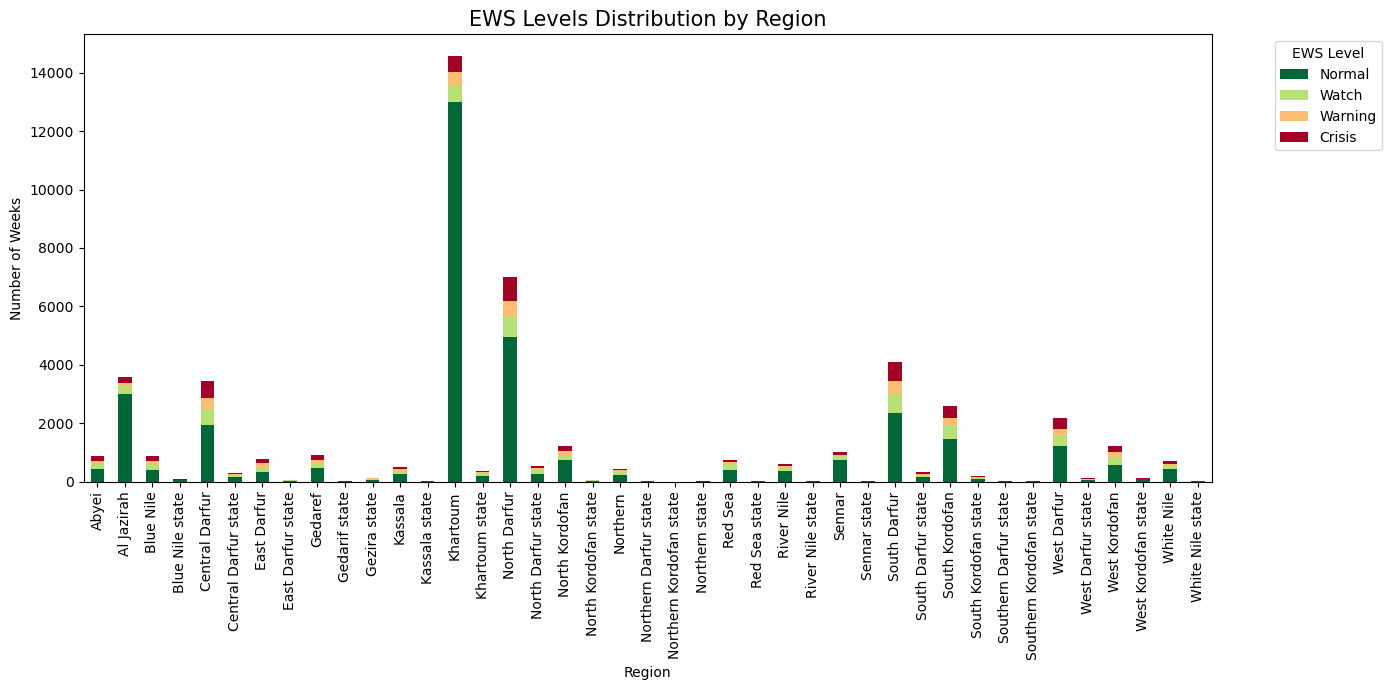

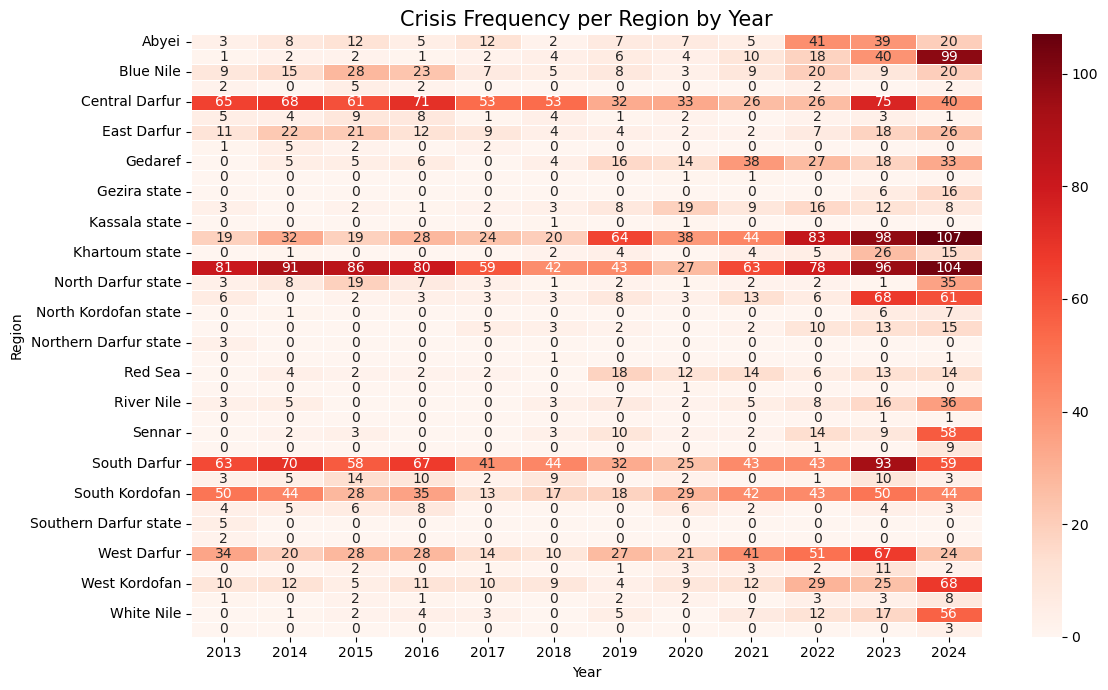

(Skipping composite trend plot — no 'EWS_composite_index' column found.)


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

ews_order = ['Normal', 'Watch', 'Warning', 'Crisis']
ews_features_df['EWS_level'] = pd.Categorical(ews_features_df['EWS_level'], categories=ews_order, ordered=True)

plt.figure(figsize=(14, 7))
region_level_counts = (
    ews_features_df.groupby(['region', 'EWS_level'])
    .size()
    .unstack(fill_value=0)
    .reindex(columns=ews_order)
)
region_level_counts.plot(kind='bar', stacked=True, colormap='RdYlGn_r', figsize=(14, 7))

plt.title('EWS Levels Distribution by Region', fontsize=15)
plt.xlabel('Region')
plt.ylabel('Number of Weeks')
plt.legend(title='EWS Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

ews_features_df['year'] = pd.to_datetime(ews_features_df['week_start']).dt.year

crisis_freq = (
    ews_features_df[ews_features_df['EWS_level'] == 'Crisis']
    .groupby(['region', 'year'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(12, 7))
sns.heatmap(crisis_freq, cmap='Reds', linewidths=0.5, annot=True, fmt='d')
plt.title('Crisis Frequency per Region by Year', fontsize=15)
plt.xlabel('Year')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

if 'EWS_composite_index' in ews_features_df.columns:
    weekly_trend = (
        ews_features_df.groupby('week_start')['EWS_composite_index']
        .mean()
        .reset_index()
    )

    plt.figure(figsize=(14, 6))
    plt.plot(weekly_trend['week_start'], weekly_trend['EWS_composite_index'], label='EWS Composite Index', color='darkblue')
    
    # Add alert thresholds for visual clarity (adjust as needed)
    plt.axhline(y=0.5, color='orange', linestyle='--', label='Watch Threshold')
    plt.axhline(y=0.7, color='red', linestyle='--', label='Crisis Threshold')

    plt.title('Average Composite EWS Index Over Time', fontsize=15)
    plt.xlabel('Week')
    plt.ylabel('EWS Composite Index')
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("(Skipping composite trend plot — no 'EWS_composite_index' column found.)")


## _______________________________________________________________________

In [74]:
acled_weekly_regional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47347 entries, 0 to 47346
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   week_start                 47347 non-null  datetime64[ns]
 1   admin1                     47347 non-null  object        
 2   event_type                 47347 non-null  object        
 3   fatalities                 47347 non-null  int64         
 4   actor1                     47347 non-null  object        
 5   total_events               47347 non-null  int64         
 6   total_fatalities           47347 non-null  int64         
 7   num_violent_events         40963 non-null  float64       
 8   actor1_diversity           47347 non-null  int64         
 9   is_violent                 47347 non-null  int64         
 10  violent_event_proportion   47347 non-null  float64       
 11  fatalities_per_event       47347 non-null  float64       
 12  acto

In [75]:
acled_weekly_regional['week_start'].head()

0   2012-12-30
1   2012-12-30
2   2013-02-10
3   2013-02-10
4   2013-02-17
Name: week_start, dtype: datetime64[ns]

In [76]:
ews_features_df['week_start'].head()

0   2012-12-30
1   2012-12-30
2   2013-02-10
3   2013-02-10
4   2013-02-17
Name: week_start, dtype: datetime64[ns]

In [77]:
ews_features_df.columns

Index(['week_start', 'region', 'total_events_unified',
       'total_fatalities_unified', 'violent_events_unified',
       'unique_actors_unified', 'proportion_violent_unified',
       'fatalities_per_event_unified', 'conflict_intensity_index_unified',
       'event_growth_rate_unified', 'fatality_growth_rate_unified',
       'EWS_score', 'EWS_level', 'Intensity_mild_flag', 'Lethality_mild_flag',
       'Diffusion_mild_flag', 'Acceleration_mild_flag', 'Volatility_mild_flag',
       'Dominance_mild_flag', 'Composite_mild_flag', 'Intensity_mod_flag',
       'Lethality_mod_flag', 'Diffusion_mod_flag', 'Acceleration_mod_flag',
       'Volatility_mod_flag', 'Dominance_mod_flag', 'Composite_mod_flag',
       'Intensity_sev_flag', 'Lethality_sev_flag', 'Diffusion_sev_flag',
       'Acceleration_sev_flag', 'Volatility_sev_flag', 'Dominance_sev_flag',
       'Composite_sev_flag', 'year'],
      dtype='object')

In [78]:
acled_weekly_regional.columns

Index(['week_start', 'admin1', 'event_type', 'fatalities', 'actor1',
       'total_events', 'total_fatalities', 'num_violent_events',
       'actor1_diversity', 'is_violent', 'violent_event_proportion',
       'fatalities_per_event', 'actor_volatility_relative',
       'conflict_intensity_index', 'geographic_spread', 'total_events_growth',
       'total_fatalities_growth'],
      dtype='object')

In [79]:

ews = ews_features_df.copy()
acled = acled_weekly_regional.copy()

def normalize_region(s):
    if pd.isna(s):
        return s
    s = str(s).strip().lower()
    s = s.replace('_', ' ')
    for suffix in [' state', ' governorate', ' wilayat']:
        if s.endswith(suffix):
            s = s[:-len(suffix)].strip()
    s = s.replace('gedarif', 'gedaref')   
    s = s.replace('gezira', 'al jazirah')
    return s

ews['region'] = ews['region'].astype(str).apply(normalize_region)
acled['admin1'] = acled['admin1'].astype(str).apply(normalize_region)

ews['week_start'] = pd.to_datetime(ews['week_start'])
acled['week_start'] = pd.to_datetime(acled['week_start'])

ews_min, ews_max = ews['week_start'].min(), ews['week_start'].max()
acled = acled[(acled['week_start'] >= ews_min) & (acled['week_start'] <= ews_max)].copy()

acled = acled.rename(columns={'admin1': 'region',
                              'total_events': 'total_events_acled',
                              'total_fatalities': 'total_fatalities_acled',
                              'num_violent_events': 'violent_events_acled',
                              'fatalities_per_event': 'fatalities_per_event_acled',
                              'conflict_intensity_index': 'conflict_intensity_index_acled',
                              'geographic_spread': 'geographic_spread_acled',
                              'total_events_growth': 'event_growth_acled',
                              'total_fatalities_growth': 'fatality_growth_acled'})

acled_keep = ['week_start', 'region',
              'total_events_acled', 'total_fatalities_acled', 'violent_events_acled',
              'fatalities_per_event_acled', 'conflict_intensity_index_acled',
              'geographic_spread_acled', 'event_growth_acled', 'fatality_growth_acled']

acled = acled[acled_keep].drop_duplicates(subset=['week_start', 'region'])

merged = pd.merge(ews, acled, on=['week_start', 'region'], how='left')

print("EWS range kept:", ews_min, "→", ews_max)
print("EWS rows:", len(ews))
print("ACLED rows within EWS range:", len(acled))
print("Merged rows:", len(merged))
print("Fraction of EWS rows with ACLED data:", merged[['total_events_acled']].notna().mean())

unmatched = merged[merged['total_events_acled'].isna()]
print("Number of unmatched EWS rows (no ACLED data):", len(unmatched))
print("Top regions missing ACLED coverage:", unmatched['region'].value_counts().head(10))


EWS range kept: 2012-12-30 00:00:00 → 2024-12-29 00:00:00
EWS rows: 49807
ACLED rows within EWS range: 6136
Merged rows: 49807
Fraction of EWS rows with ACLED data: total_events_acled    0.997269
dtype: float64
Number of unmatched EWS rows (no ACLED data): 136
Top regions missing ACLED coverage: region
west kordofan        32
southern darfur      23
southern kordofan    18
northern darfur      14
blue nile            12
east darfur           7
south darfur          6
west darfur           5
central darfur        4
north kordofan        4
Name: count, dtype: int64


## Internal Consistency and Construct Coherence

### a) Inter-indicator correlations


                        Intensity_mild_flag  Lethality_mild_flag  \
Intensity_mild_flag                1.000000             0.383645   
Lethality_mild_flag                0.383645             1.000000   
Diffusion_mild_flag                0.449110             0.287572   
Acceleration_mild_flag             0.465456             0.277491   
Volatility_mild_flag               0.376598             0.455907   
Dominance_mild_flag                0.415858             0.319856   

                        Diffusion_mild_flag  Acceleration_mild_flag  \
Intensity_mild_flag                0.449110                0.465456   
Lethality_mild_flag                0.287572                0.277491   
Diffusion_mild_flag                1.000000                0.411672   
Acceleration_mild_flag             0.411672                1.000000   
Volatility_mild_flag               0.281697                0.381431   
Dominance_mild_flag                0.172767                0.197521   

                        V

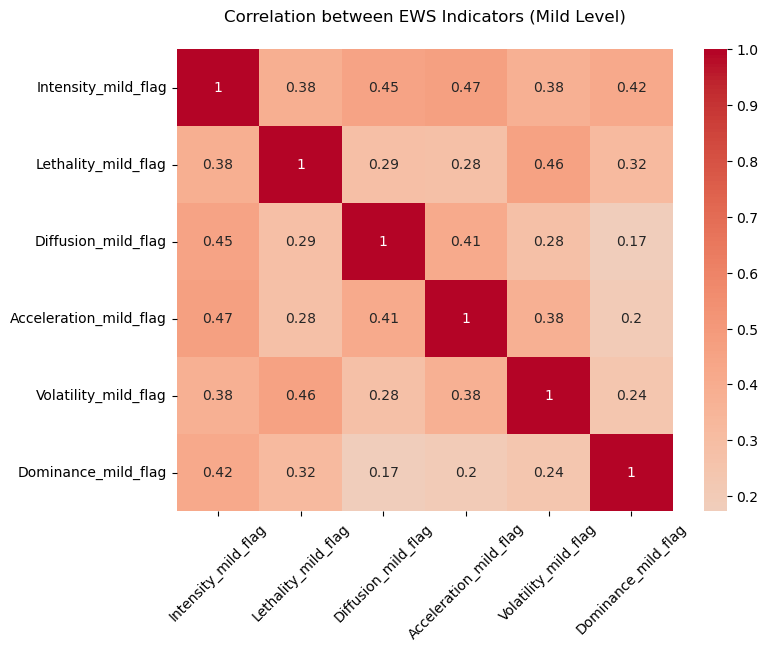

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the mild-level indicator flags for analysis
indicators = [
    'Intensity_mild_flag','Lethality_mild_flag','Diffusion_mild_flag',
    'Acceleration_mild_flag','Volatility_mild_flag','Dominance_mild_flag'
]

# Compute correlation matrix
corr_matrix = ews_features_df[indicators].corr()

# Display correlation matrix
print(corr_matrix)

# visualize correlations
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation between EWS Indicators (Mild Level)', pad=20) 
plt.xticks(rotation=45)   # Rotate x-axis labels
plt.yticks(rotation=0)    # Keep y-axis labels horizontal
plt.show()


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

# Standardize indicators
X = ews_features_df[indicators]
X_scaled = StandardScaler().fit_transform(X)

# Run PCA
pca = PCA(n_components=len(indicators))
pca.fit(X_scaled)

# Explained variance per component
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio by PCA components:", explained_variance)

# Correlation of first principal component with composite EWS
first_pc = pca.transform(X_scaled)[:,0]
correlation = np.corrcoef(first_pc, ews_features_df['Composite_mild_flag'])[0,1]
print("Correlation between first PC and Composite EWS:", correlation)


Explained variance ratio by PCA components: [0.45456651 0.15259976 0.13311956 0.10307353 0.08223769 0.07440295]
Correlation between first PC and Composite EWS: 0.6501399728935211


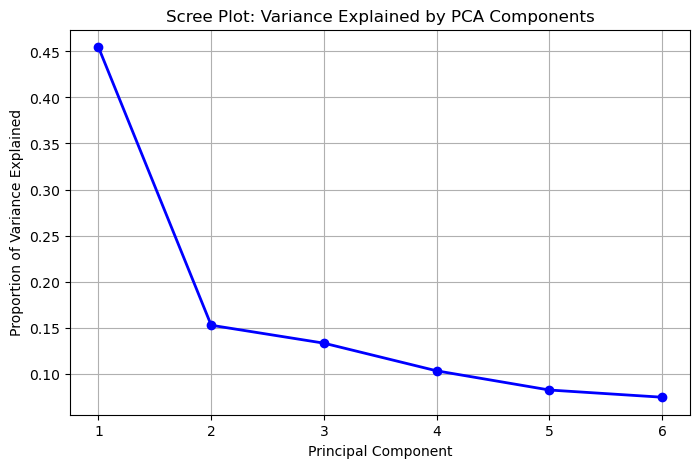

In [84]:
import matplotlib.pyplot as plt

# Components
components = np.arange(1, len(explained_variance)+1)

plt.figure(figsize=(8,5))
plt.plot(components, explained_variance, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot: Variance Explained by PCA Components')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(components)
plt.grid(True)
plt.show()


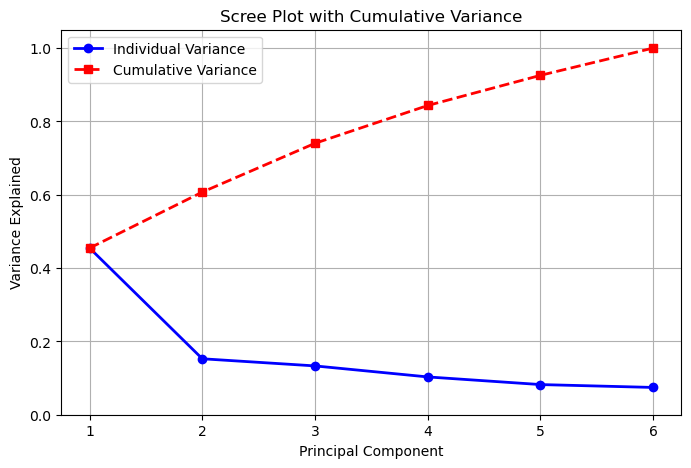

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Components
components = np.arange(1, len(explained_variance)+1)
cumulative_variance = np.cumsum(explained_variance)

plt.figure(figsize=(8,5))
plt.plot(components, explained_variance, 'o-', linewidth=2, color='blue', label='Individual Variance')
plt.plot(components, cumulative_variance, 's--', linewidth=2, color='red', label='Cumulative Variance')
plt.title('Scree Plot with Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(components)
plt.ylim(0,1.05)
plt.grid(True)
plt.legend()
plt.show()


### b) Temporal consistency / autocorrelation


In [86]:
# Group by region
regions = ews_features_df['region'].unique()
autocorr_results = {}

for r in regions:
    series = ews_features_df.loc[ews_features_df['region']==r, 'Composite_mild_flag']
    # Autocorrelation at lag 1 week
    autocorr_results[r] = series.autocorr(lag=1)

autocorr_df = pd.DataFrame.from_dict(autocorr_results, orient='index', columns=['lag1_autocorr'])
print(autocorr_df)


                         lag1_autocorr
Abyei                         0.672372
Al Jazirah                    0.726235
Blue Nile                     0.633875
Blue Nile state               0.422222
Central Darfur                0.680018
Central Darfur state          0.516420
East Darfur                   0.600777
East Darfur state             0.309365
Gedaref                       0.582050
Gedarif state                 0.271429
Gezira state                  0.599415
Kassala                       0.547283
Kassala state                -0.500000
Khartoum                      0.747768
Khartoum state                0.637247
North Darfur                  0.726455
North Darfur state            0.636115
North Kordofan                0.701378
North Kordofan state          0.369250
Northern                      0.631797
Northern Darfur state         0.272475
Northern Kordofan state            NaN
Northern state               -0.333333
Red Sea                       0.630878
Red Sea state            

D:\Anaconda\Lib\site-packages\numpy\lib\_function_base_impl.py:2991: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
D:\Anaconda\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
D:\Anaconda\Lib\site-packages\numpy\lib\_function_base_impl.py:2848: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


#### Visualization

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19420\183178454.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


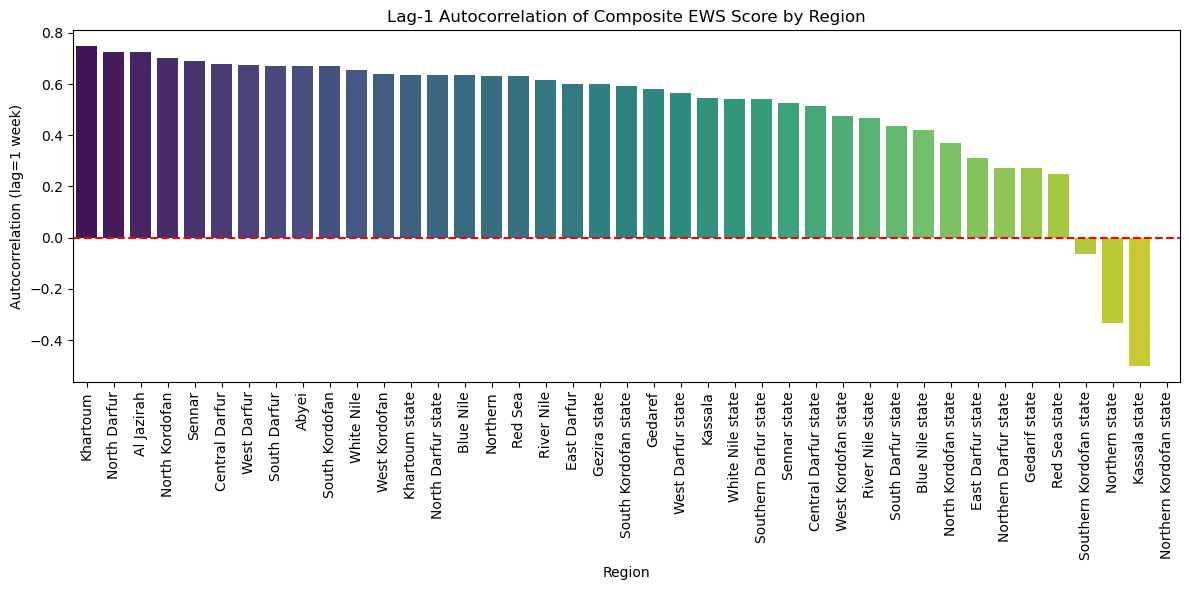

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort by autocorrelation for better visualization
autocorr_df_sorted = autocorr_df.sort_values(by='lag1_autocorr', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(
    x=autocorr_df_sorted.index, 
    y=autocorr_df_sorted['lag1_autocorr'], 
    palette='viridis'
)
plt.xticks(rotation=90)
plt.axhline(0, color='red', linestyle='--')
plt.title('Lag-1 Autocorrelation of Composite EWS Score by Region')
plt.ylabel('Autocorrelation (lag=1 week)')
plt.xlabel('Region')
plt.tight_layout()
plt.show()


## 2. Empirical Validation Enhancements

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49807 entries, 0 to 49806
Data columns (total 37 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   week_start                        49807 non-null  datetime64[ns]
 1   region                            49807 non-null  object        
 2   total_events_unified              49807 non-null  float64       
 3   total_fatalities_unified          49807 non-null  float64       
 4   violent_events_unified            49807 non-null  float64       
 5   unique_actors_unified             49807 non-null  float64       
 6   proportion_violent_unified        49807 non-null  float64       
 7   fatalities_per_event_unified      49807 non-null  float64       
 8   conflict_intensity_index_unified  49807 non-null  float64       
 9   event_growth_rate_unified         49807 non-null  float64       
 10  fatality_growth_rate_unified      49807 non-nu

## 3. Robustness / Sensitivity Enhancements

### a) Alternative composite constructions


In [89]:
# Example alternative weights
weights = {'Intensity_mild_flag':0.3, 'Lethality_mild_flag':0.3,
           'Diffusion_mild_flag':0.2, 'Volatility_mild_flag':0.1,
           'Dominance_mild_flag':0.1}

# Compute new composite score
df['Composite_alt'] = sum(df[col]*w for col,w in weights.items())
# Correlation with original
print("Correlation between original and alternative composite:", df['Composite_mild_flag'].corr(df['Composite_alt']))


Correlation between original and alternative composite: 0.637701586942422


### b) Bootstrapping / Monte Carlo simulations


In [90]:
import numpy as np

n_iter = 1000
correlations = []

for i in range(n_iter):
    # Sample weekly values with replacement
    sample = df[indicators].sample(frac=1, replace=True)
    # Compute composite as mean of indicators
    composite_boot = sample.mean(axis=1)
    correlations.append(composite_boot.corr(df['Composite_mild_flag']))

print("Bootstrap composite correlations (summary):", np.mean(correlations), np.std(correlations))


Bootstrap composite correlations (summary): 0.6566387806453029 0.003861691204379767


### c) Threshold sensitivity analysis



In [92]:
threshold = df['total_fatalities_unified'].quantile(0.75)
df['high_fatality'] = (df['total_fatalities_unified'] >= threshold).astype(int)

ks = [1.0, 1.5, 2.0]
results = {}

for k in ks:
    threshold = df['EWS_score'].mean() + k*df['EWS_score'].std()
    alerts = (df['EWS_score'] > threshold).astype(int)
    precision = (alerts & df['high_fatality']).sum() / alerts.sum()
    recall = (alerts & df['high_fatality']).sum() / df['high_fatality'].sum()
    results[k] = {'precision':precision, 'recall':recall}

print("Threshold sensitivity results:", results)


Threshold sensitivity results: {1.0: {'precision': np.float64(0.09461836088638761), 'recall': np.float64(0.042981545098665815)}, 1.5: {'precision': np.float64(0.11545338441890166), 'recall': np.float64(0.03611088919070065)}, 2.0: {'precision': np.float64(0.1247187399549984), 'recall': np.float64(0.03099784293361029)}}


### d) Temporal aggregation windows


In [93]:
# Resample weekly to biweekly mean per region
df_biweekly = (
    df.groupby('region')
      .resample('2W', on='week_start')['EWS_score']
      .mean()
      .reset_index()
)

# Initialize dictionary to store correlations
corrs = {}

for region in df['region'].unique():
    # Biweekly series
    biweekly_series = df_biweekly[df_biweekly['region']==region].set_index('week_start')['EWS_score']
    
    # Weekly series
    weekly_series = df[df['region']==region].set_index('week_start')['EWS_score']
    
    # Align indices by resampling weekly to biweekly means (same time periods)
    weekly_aligned = weekly_series.resample('2W').mean()
    
    # Drop any NaNs in either series
    merged = pd.concat([biweekly_series, weekly_aligned], axis=1, join='inner').dropna()
    
    # Compute correlation
    corrs[region] = merged.iloc[:,0].corr(merged.iloc[:,1])

# Convert to DataFrame
corrs_df = pd.DataFrame.from_dict(corrs, orient='index', columns=['biweekly_vs_weekly_corr'])
print(corrs_df)


D:\Anaconda\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]


                         biweekly_vs_weekly_corr
Abyei                                        1.0
Al Jazirah                                   1.0
Blue Nile                                    1.0
Blue Nile state                              1.0
Central Darfur                               1.0
Central Darfur state                         1.0
East Darfur                                  1.0
East Darfur state                            1.0
Gedaref                                      1.0
Gedarif state                                1.0
Gezira state                                 1.0
Kassala                                      1.0
Kassala state                                1.0
Khartoum                                     1.0
Khartoum state                               1.0
North Darfur                                 1.0
North Darfur state                           1.0
North Kordofan                               1.0
North Kordofan state                         1.0
Northern            

In [94]:
for col in indicators:
    temp = df[indicators].drop(columns=[col]).mean(axis=1)
    corr = temp.corr(df['Composite_mild_flag'])
    print(f"Correlation with Composite when dropping {col}: {corr:.3f}")


Correlation with Composite when dropping Intensity_mild_flag: 0.626
Correlation with Composite when dropping Lethality_mild_flag: 0.649
Correlation with Composite when dropping Diffusion_mild_flag: 0.669
Correlation with Composite when dropping Acceleration_mild_flag: 0.671
Correlation with Composite when dropping Volatility_mild_flag: 0.677
Correlation with Composite when dropping Dominance_mild_flag: 0.559


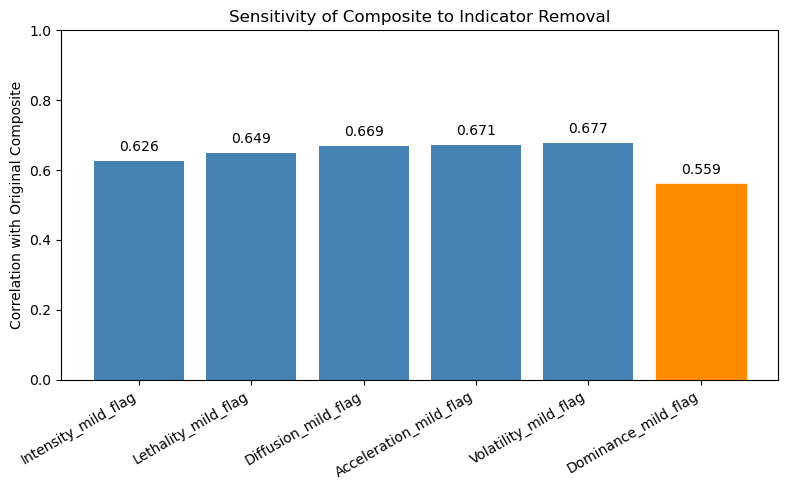

In [95]:
import matplotlib.pyplot as plt
import pandas as pd

# Indicators and correlations when removed
indicators = ['Intensity_mild_flag', 'Lethality_mild_flag', 'Diffusion_mild_flag',
              'Acceleration_mild_flag', 'Volatility_mild_flag', 'Dominance_mild_flag']
correlations = [0.626, 0.649, 0.669, 0.671, 0.677, 0.559]

# Create DataFrame for plotting
df_plot = pd.DataFrame({
    'Indicator': indicators,
    'Correlation': correlations
})

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(df_plot['Indicator'], df_plot['Correlation'], color='steelblue')
plt.ylim(0,1)
plt.ylabel('Correlation with Original Composite')
plt.title('Sensitivity of Composite to Indicator Removal')

# Highlight the indicator with lowest correlation
min_idx = df_plot['Correlation'].idxmin()
bars[min_idx].set_color('darkorange')

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.3f}', ha='center', va='bottom')

plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


In [97]:
ews_features_df.columns

Index(['week_start', 'region', 'total_events_unified',
       'total_fatalities_unified', 'violent_events_unified',
       'unique_actors_unified', 'proportion_violent_unified',
       'fatalities_per_event_unified', 'conflict_intensity_index_unified',
       'event_growth_rate_unified', 'fatality_growth_rate_unified',
       'EWS_score', 'EWS_level', 'Intensity_mild_flag', 'Lethality_mild_flag',
       'Diffusion_mild_flag', 'Acceleration_mild_flag', 'Volatility_mild_flag',
       'Dominance_mild_flag', 'Composite_mild_flag', 'Intensity_mod_flag',
       'Lethality_mod_flag', 'Diffusion_mod_flag', 'Acceleration_mod_flag',
       'Volatility_mod_flag', 'Dominance_mod_flag', 'Composite_mod_flag',
       'Intensity_sev_flag', 'Lethality_sev_flag', 'Diffusion_sev_flag',
       'Acceleration_sev_flag', 'Volatility_sev_flag', 'Dominance_sev_flag',
       'Composite_sev_flag', 'year'],
      dtype='object')

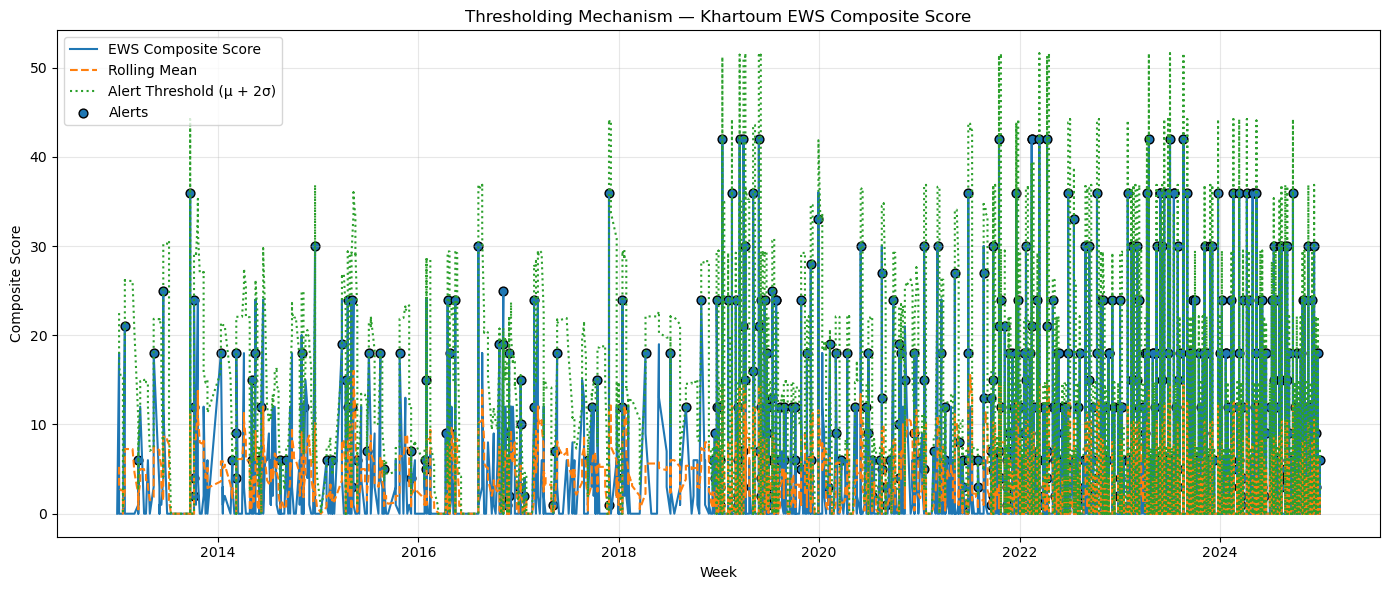

Total Alerts in Khartoum: 517


In [98]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Filter Khartoum Data ---
df_khartoum = ews_features_df[ews_features_df['region'] == 'Khartoum'].copy()
df_khartoum = df_khartoum.sort_values('week_start')

# --- Compute rolling mean and std ---
window = 8  # weeks (adjustable for sensitivity)
df_khartoum['rolling_mean'] = df_khartoum['EWS_score'].rolling(window, min_periods=4).mean()
df_khartoum['rolling_std'] = df_khartoum['EWS_score'].rolling(window, min_periods=4).std()

# Adaptive dynamic threshold
k = 2
df_khartoum['upper_threshold'] = df_khartoum['rolling_mean'] + k * df_khartoum['rolling_std']

# Identify alerts
df_khartoum['alert_flag'] = df_khartoum['EWS_score'] > df_khartoum['upper_threshold']

# --- Plot ---
plt.figure(figsize=(14, 6))
plt.plot(df_khartoum['week_start'], df_khartoum['EWS_score'], label='EWS Composite Score')
plt.plot(df_khartoum['week_start'], df_khartoum['rolling_mean'], linestyle='--', label='Rolling Mean')
plt.plot(df_khartoum['week_start'], df_khartoum['upper_threshold'], linestyle=':', label='Alert Threshold (μ + 2σ)')

# Highlight alert points
alert_points = df_khartoum[df_khartoum['alert_flag']]
plt.scatter(alert_points['week_start'], alert_points['EWS_score'], s=40, edgecolor="black", label='Alerts')

plt.title('Thresholding Mechanism — Khartoum EWS Composite Score')
plt.xlabel('Week')
plt.ylabel('Composite Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save high-resolution figure for publication (recommended 600 DPI for JPR)
plt.savefig("Khartoum_EWS_Thresholding.png", dpi=600, bbox_inches='tight')

plt.show()

print(f"Total Alerts in Khartoum: {alert_points.shape[0]}")


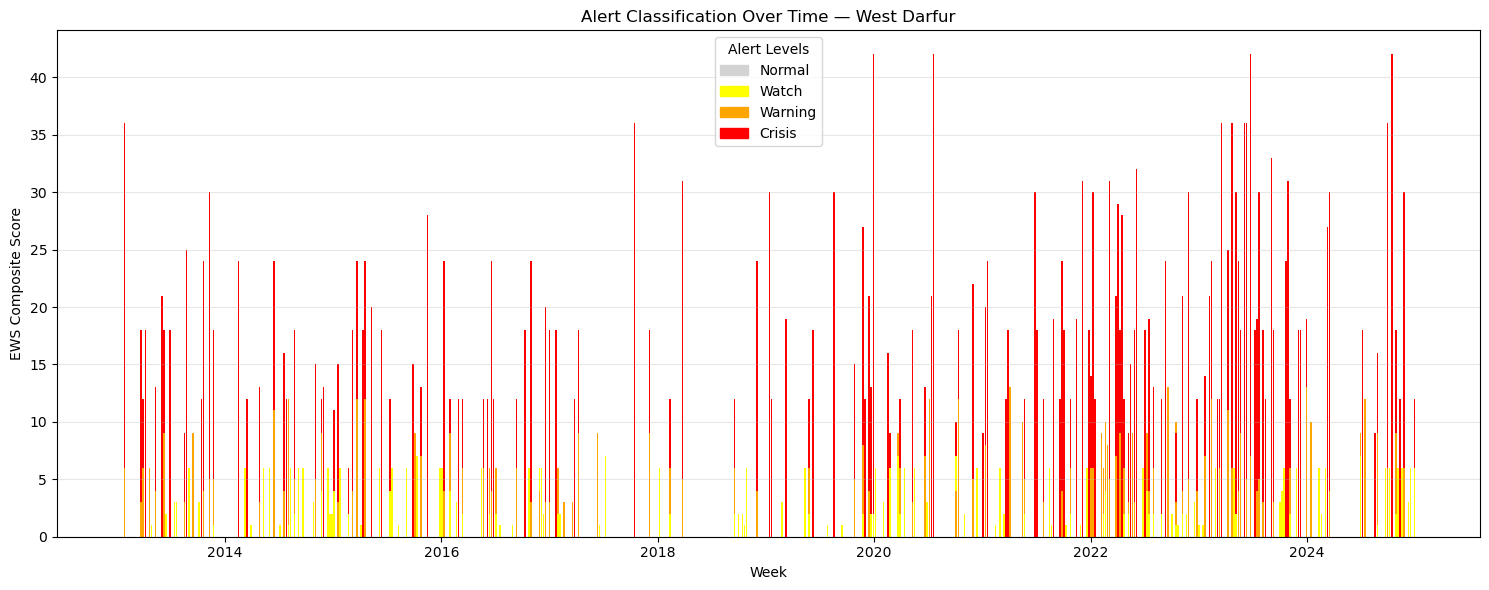

Alert Classification Plot Completed for West Darfur


In [99]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Filter West Darfur Data ---
df_wdarfur = ews_features_df[ews_features_df['region'] == 'West Darfur'].copy()
df_wdarfur = df_wdarfur.sort_values('week_start')

# Color map for alert categories
alert_colors = {
    'Normal': 'lightgray',
    'Watch': 'yellow',
    'Warning': 'orange',
    'Crisis': 'red'
}

plt.figure(figsize=(15, 6))

# Bar chart with colors based on alert level
plt.bar(
    df_wdarfur['week_start'],
    df_wdarfur['EWS_score'],
    color=[alert_colors.get(level, 'lightgray') for level in df_wdarfur['EWS_level']],
    width=5,
    label='EWS Composite Score'
)

# Add legend manually (for clarity in publication)
handles = [plt.Rectangle((0, 0), 1, 1, color=alert_colors[level]) for level in alert_colors]
labels = list(alert_colors.keys())
plt.legend(handles, labels, title="Alert Levels")

plt.title("Alert Classification Over Time — West Darfur")
plt.xlabel("Week")
plt.ylabel("EWS Composite Score")
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig("Alert_Classification_WestDarfur.png", dpi=600, bbox_inches='tight')

plt.show()

print("Alert Classification Plot Completed for West Darfur")
